In [1]:
# libraries 
import os  
import seaborn as sns 
import cv2 
import tensorflow as tf  
import matplotlib.pyplot as plt 
import time 
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.utils import shuffle  
from keras.saving import save_model 
import numpy as np
from sklearn.model_selection import KFold 
from keras.models import Model, load_model 
from tensorflow.keras.applications import Xception, InceptionV3, DenseNet121
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [16]:
def visualize(history): 

    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    # Training and Validation Loss
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    return plt.show() 

In [17]:
def visualize_2(history): 
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}' 
    
    # Plot training history
    plt.figure(figsize=(20, 8))
    plt.style.use('fivethirtyeight') 
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label='Training loss')
    plt.plot(Epochs, val_loss, 'g', label='Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [18]:
def visualize_3 (history): 
    import matplotlib.pyplot as plt
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1) 
    #plt.gca().set_ylim([0, 1.0])
    plt.plot(train_accuracy, label='Training Accuracy', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()


    # Plot validation accuracy
    plt.subplot(1, 2, 2) 
    #plt.gca().set_ylim([0, 1.0])
    plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


    # Plot training and validation loss
    plt.figure(figsize=(20, 8))

    # Plot training loss
    plt.subplot(1, 2, 1) 
    #plt.gca().set_ylim([0, 1.0])
    plt.plot(train_loss, label='Training Loss', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.title('Training Loss')
    plt.legend()

    # Plot validation loss
    plt.subplot(1, 2, 2) 
    #plt.gca().set_ylim([0, 1.0])
    plt.plot(val_loss, label='Validation Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.title('Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [20]:
labels = ['glioma','meningioma','notumor','pituitary']    

X_train = []
y_train = []
image_size = 299

for i in labels:
    folderPath = os.path.join('./DataSet_2','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('./DataSet_2','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 364.86it/s]


In [21]:
X_train, y_train = shuffle(X_train,y_train, random_state=101) 

In [22]:
X_train.shape

(3264, 299, 299, 3)

In [23]:
labels = ['glioma','meningioma','notumor','pituitary']    
label_to_index = {labels: index for index, labels in enumerate(labels)}
y_train_indices = np.array([label_to_index[labels] for labels in y_train])

# Convert indices to one-hot encoded vectors
y_train_one_encoded = tf.keras.utils.to_categorical(y_train_indices, num_classes=len(labels))

In [24]:
y_train_one_encoded.shape

(3264, 4)

# -------------------------------------------- Transfer Learning Models -------------------------------------------

##  ///////////////////////////////////////////////////  Xception  //////////////////////////////////////////////////////////////

In [26]:
base_model_Xception = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3)) 

NUM_CLASSES = 4   

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Define learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001) 

# Freeze all layers in the base model 
for layer in base_model_Xception.layers:
    layer.trainable = False 
    
# add global average pooling layer
x = base_model_Xception.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)  

# Add dropout layer
x = tf.keras.layers.Dropout(0.5)(x)  # 0.5 is the dropout rate
# output layer
outputlayer_Xception = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)   

#creating new model
model_Xception = tf.keras.Model(inputs=base_model_Xception.input, outputs=outputlayer_Xception) 

# Compile model
model_Xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   

Fold 1/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.4285 - loss: 3.5318 - val_accuracy: 0.6616 - val_loss: 1.2700 - learning_rate: 0.0010
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.6803 - loss: 1.1162 - val_accuracy: 0.7504 - val_loss: 0.6981 - learning_rate: 0.0010
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.7612 - loss: 0.6800 - val_accuracy: 0.7856 - val_loss: 0.6336 - learning_rate: 0.0010
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8017 - loss: 0.5504 - val_accuracy: 0.7810 - val_loss: 0.6039 - learning_rate: 0.0010
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8057 - loss: 0.5572 - val_accuracy: 0.7519 - val_loss: 0.6470 - learning_rate: 0.0010
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8167 - loss: 0.4948 - val_accuracy: 0.7734 - val_loss: 0.5934 - learning_rate: 0.0010
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8237 - loss: 0.4904 - val_a

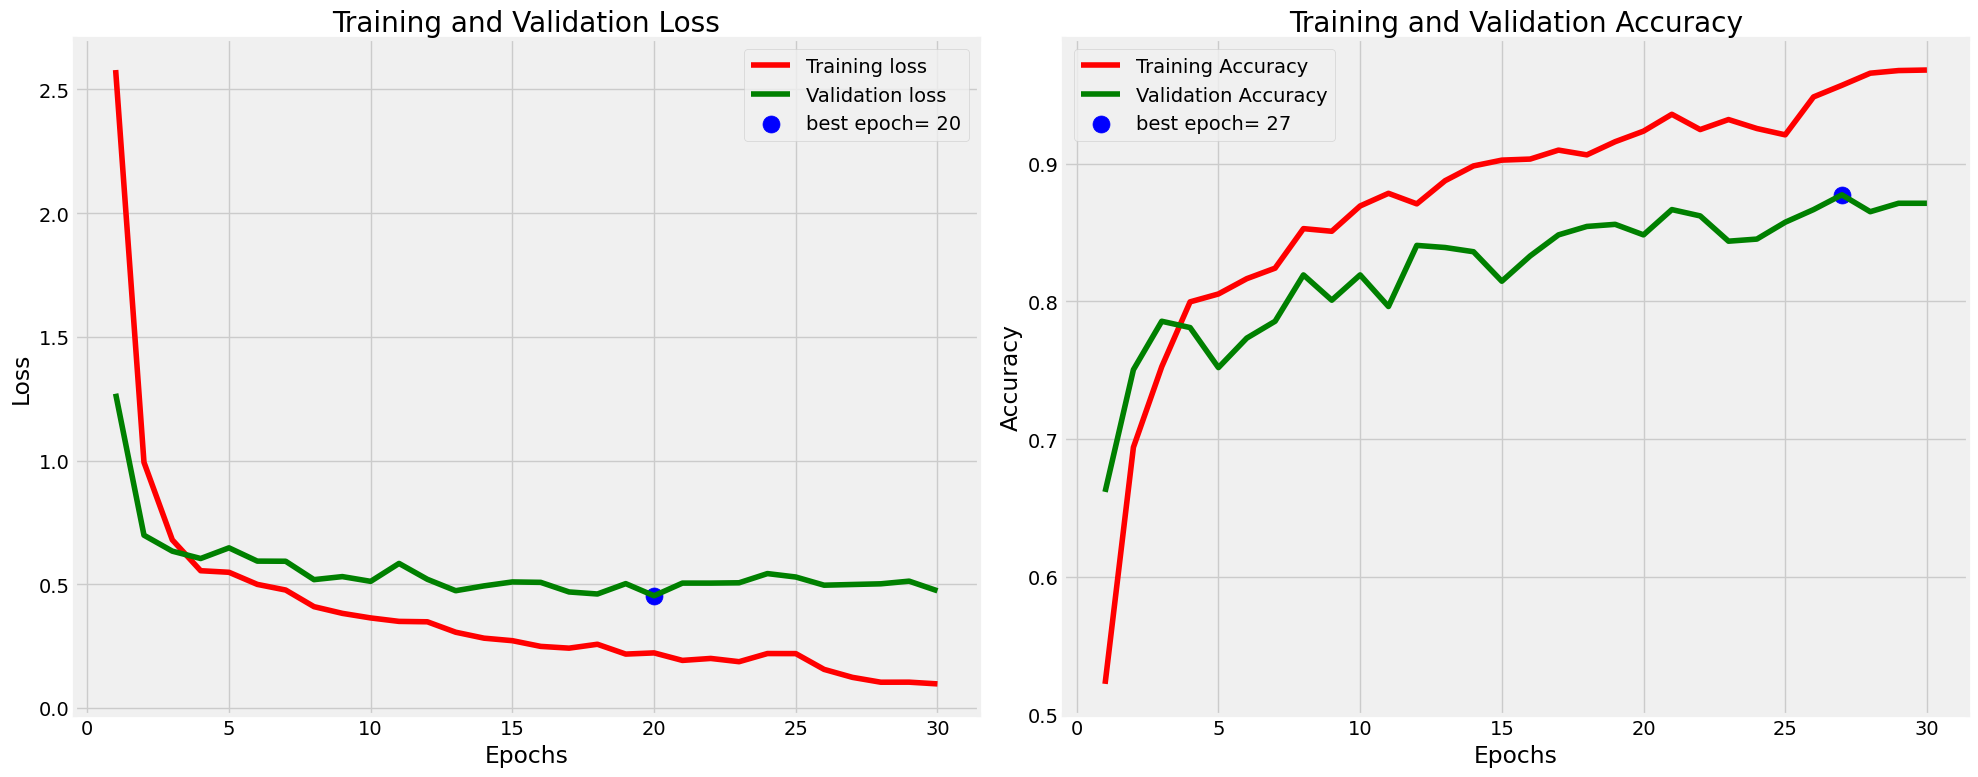

21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 824ms/step
Classification Report for Fold 1
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       198
           1       0.78      0.80      0.79       193
           2       0.86      0.88      0.87        97
           3       0.92      0.92      0.92       165

    accuracy                           0.85       653
   macro avg       0.85      0.85      0.85       653
weighted avg       0.85      0.85      0.85       653

21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 802ms/step


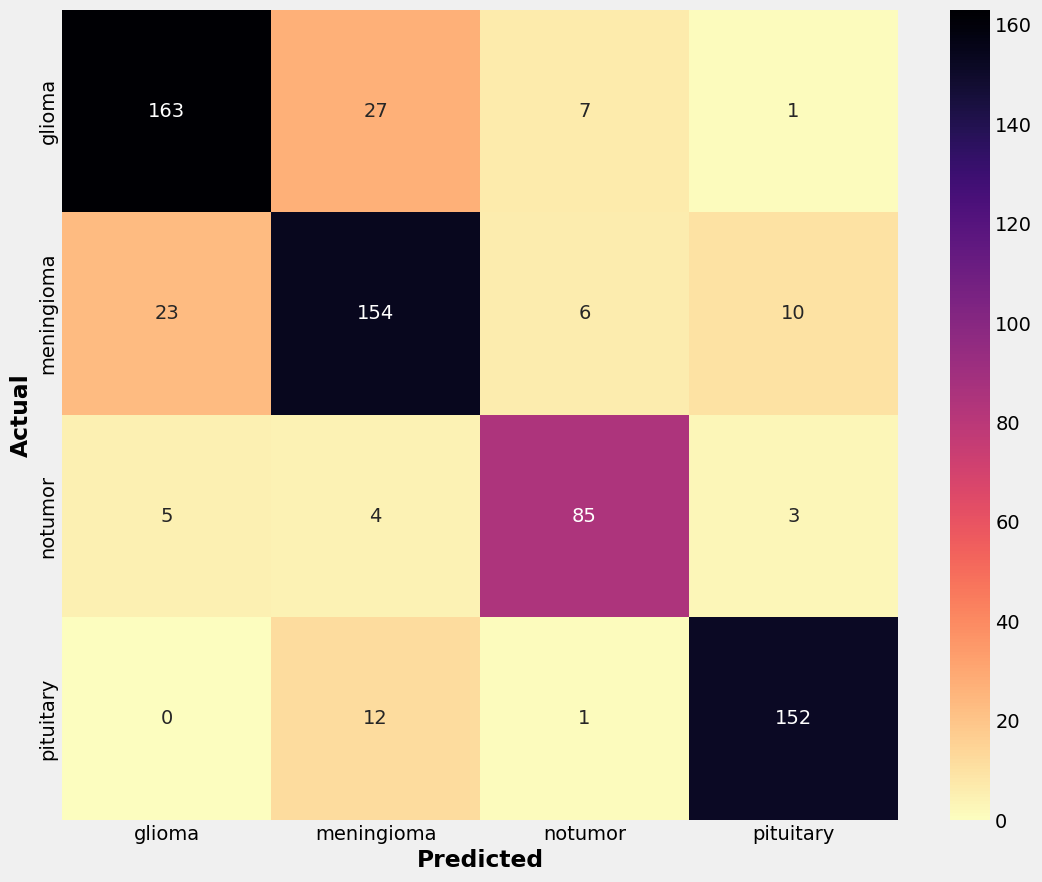

Fold 2/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9122 - loss: 0.2666 - val_accuracy: 0.9678 - val_loss: 0.1182 - learning_rate: 2.5000e-04
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9265 - loss: 0.2076 - val_accuracy: 0.9740 - val_loss: 0.1078 - learning_rate: 2.5000e-04
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9344 - loss: 0.1960 - val_accuracy: 0.9740 - val_loss: 0.1115 - learning_rate: 2.5000e-04
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9360 - loss: 0.1854 - val_accuracy: 0.9740 - val_loss: 0.0997 - learning_rate: 2.5000e-04
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9455 - loss: 0.1763 - val_accuracy: 0.9648 - val_loss: 0.1199 - learning_rate: 2.5000e-04
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9445 - loss: 0.1701 - val_accuracy: 0.9786 - val_loss: 0.1033 - learning_rate: 2.5000e-04
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.948

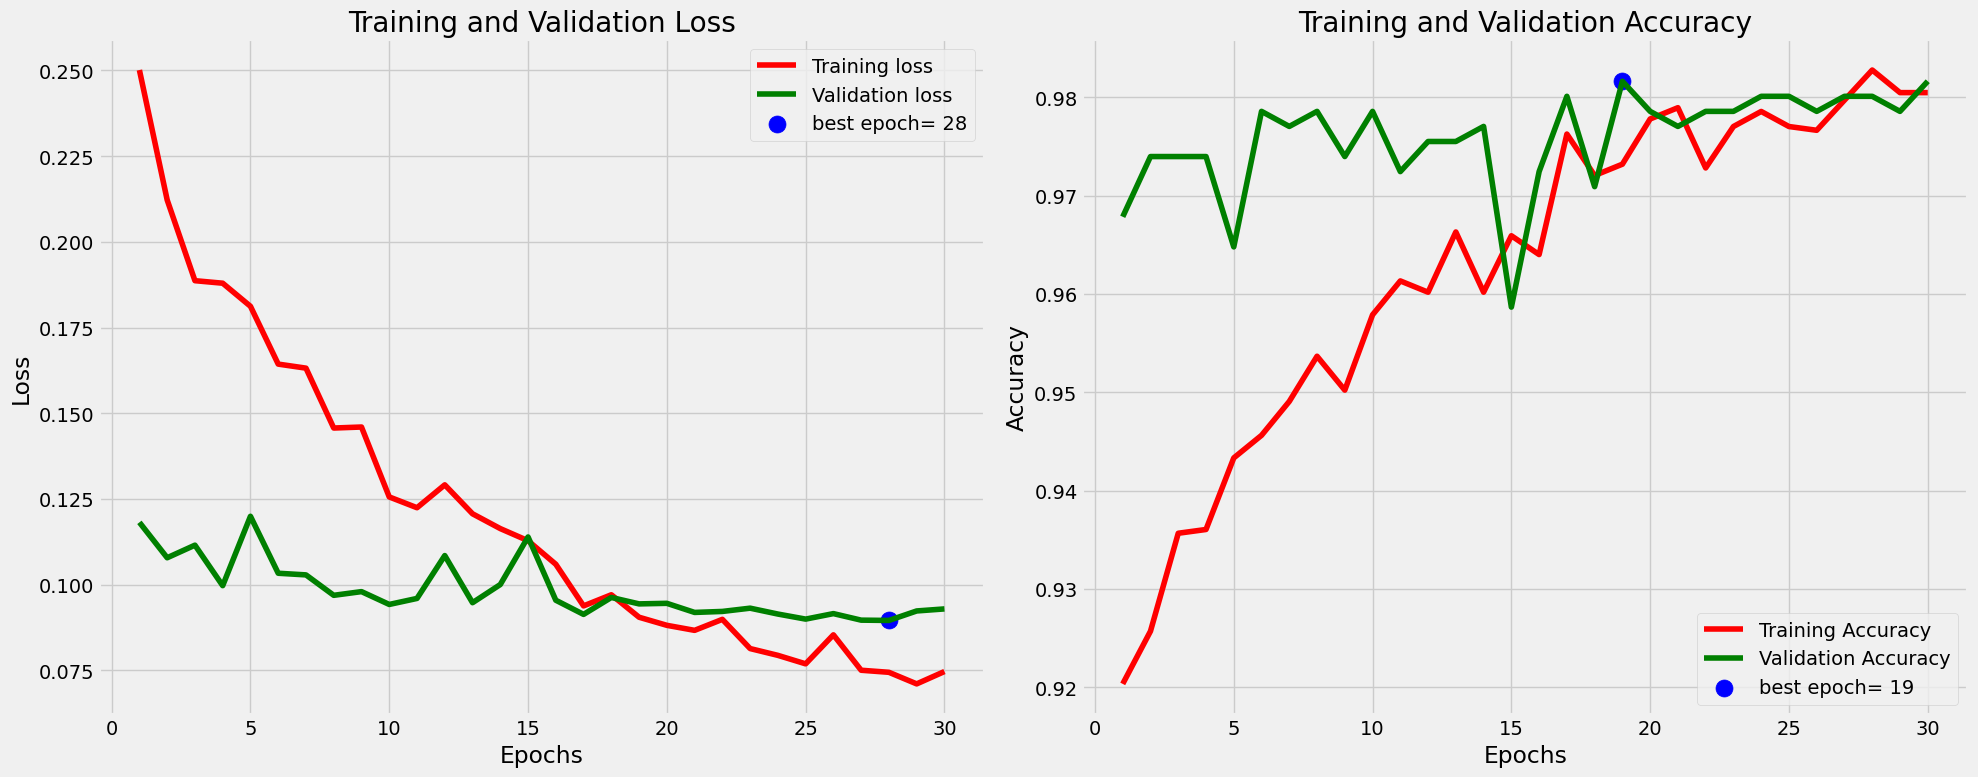

21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 801ms/step
Classification Report for Fold 2
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       190
           1       0.96      0.97      0.97       198
           2       1.00      0.99      1.00       105
           3       0.99      1.00      1.00       160

    accuracy                           0.98       653
   macro avg       0.98      0.98      0.98       653
weighted avg       0.98      0.98      0.98       653

21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 808ms/step


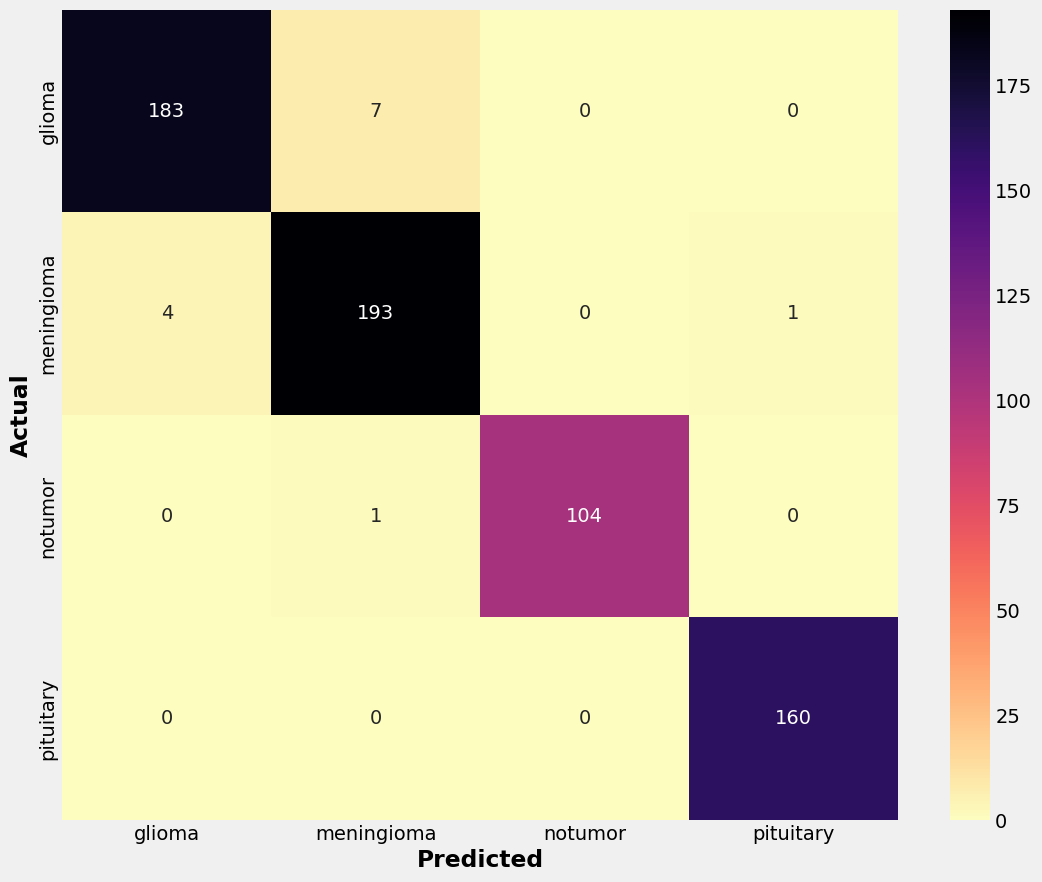

Fold 3/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9667 - loss: 0.0996 - val_accuracy: 0.9954 - val_loss: 0.0346 - learning_rate: 6.2500e-05
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9731 - loss: 0.0827 - val_accuracy: 0.9954 - val_loss: 0.0353 - learning_rate: 6.2500e-05
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9727 - loss: 0.0871 - val_accuracy: 0.9969 - val_loss: 0.0350 - learning_rate: 6.2500e-05
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9754 - loss: 0.0852 - val_accuracy: 0.9969 - val_loss: 0.0352 - learning_rate: 6.2500e-05
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9759 - loss: 0.0887 - val_accuracy: 0.9969 - val_loss: 0.0371 - learning_rate: 6.2500e-05
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9732 - loss: 0.0822 - val_accuracy: 0.9969 - val_loss: 0.0356 - learning_rate: 6.2500e-05
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.973

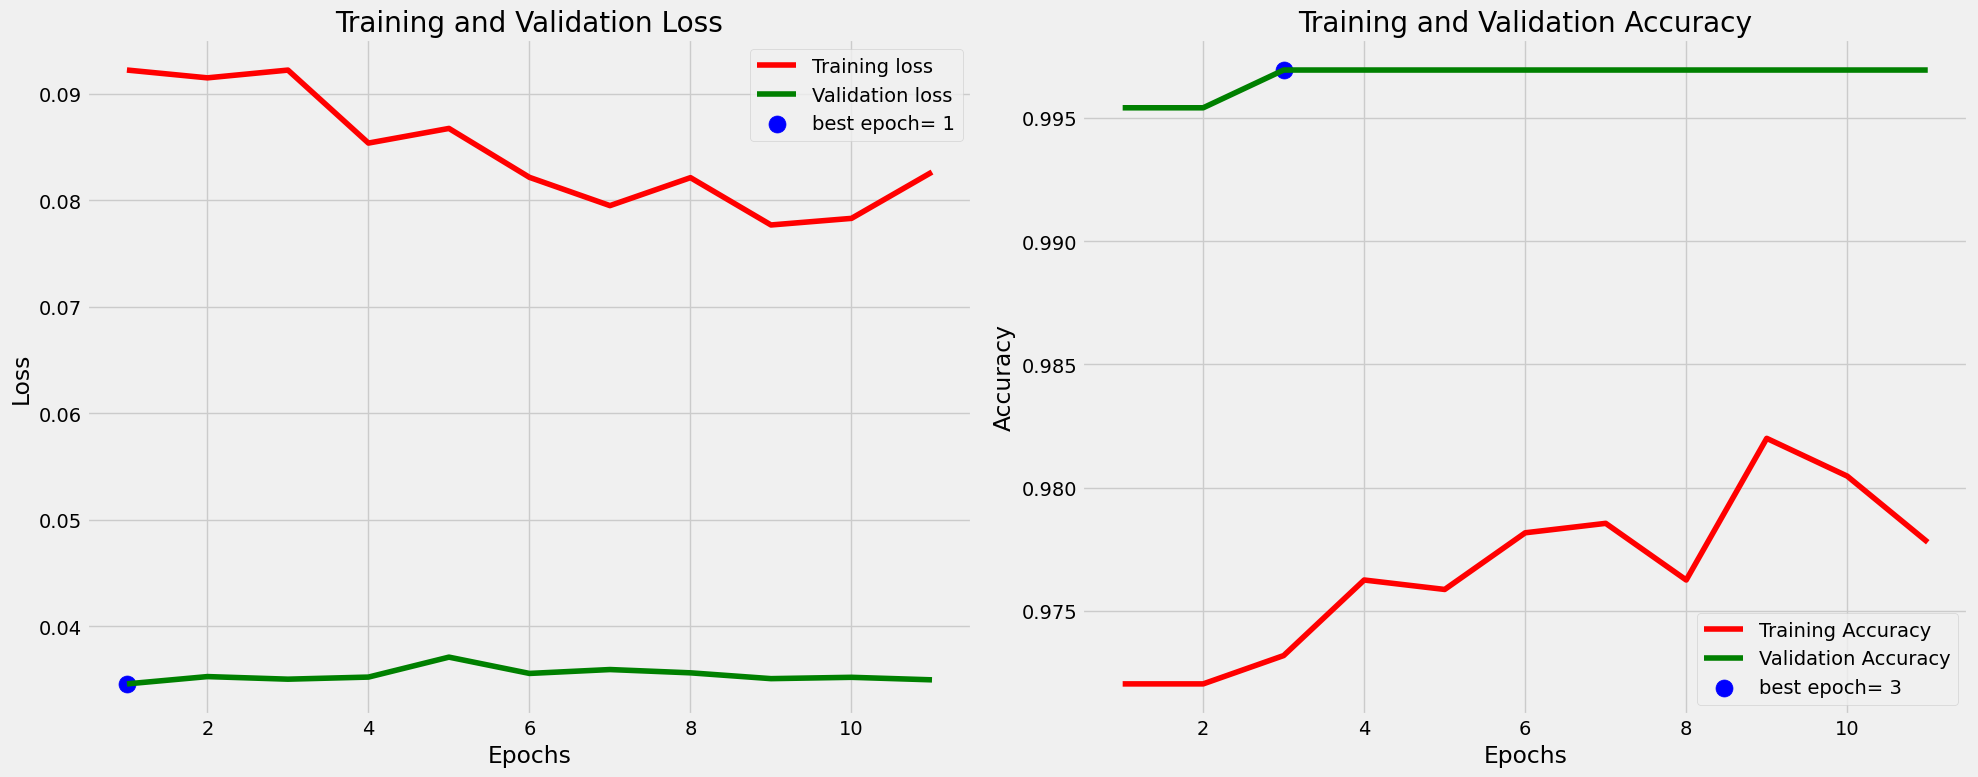

21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 784ms/step
Classification Report for Fold 3
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       174
           1       0.98      1.00      0.99       184
           2       1.00      1.00      1.00       110
           3       1.00      1.00      1.00       185

    accuracy                           1.00       653
   macro avg       1.00      1.00      1.00       653
weighted avg       1.00      1.00      1.00       653

21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 791ms/step


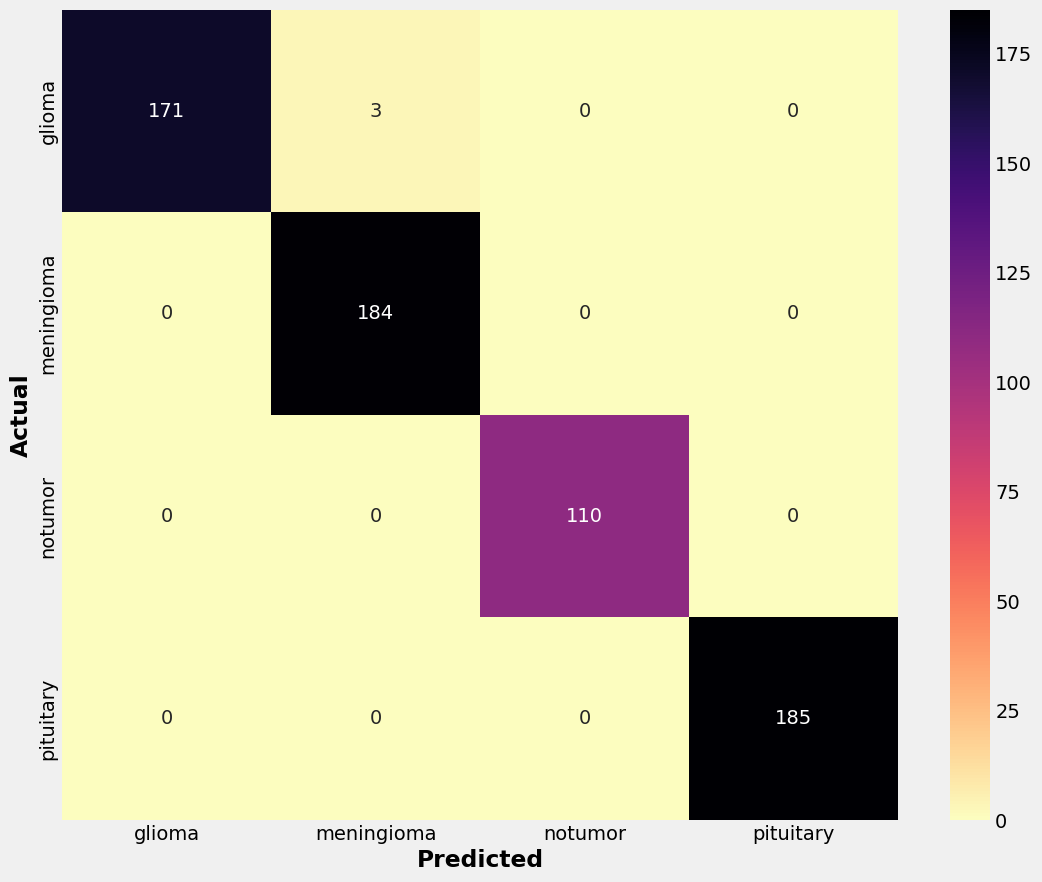

Fold 4/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9736 - loss: 0.0811 - val_accuracy: 0.9954 - val_loss: 0.0396 - learning_rate: 1.5625e-05
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9737 - loss: 0.0868 - val_accuracy: 0.9954 - val_loss: 0.0400 - learning_rate: 1.5625e-05
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9769 - loss: 0.0824 - val_accuracy: 0.9954 - val_loss: 0.0400 - learning_rate: 1.5625e-05
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9786 - loss: 0.0779 - val_accuracy: 0.9954 - val_loss: 0.0401 - learning_rate: 1.5625e-05
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9748 - loss: 0.0866 - val_accuracy: 0.9954 - val_loss: 0.0400 - learning_rate: 1.5625e-05
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9770 - loss: 0.0785 - val_accuracy: 0.9954 - val_loss: 0.0407 - learning_rate: 1.5625e-05
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.974

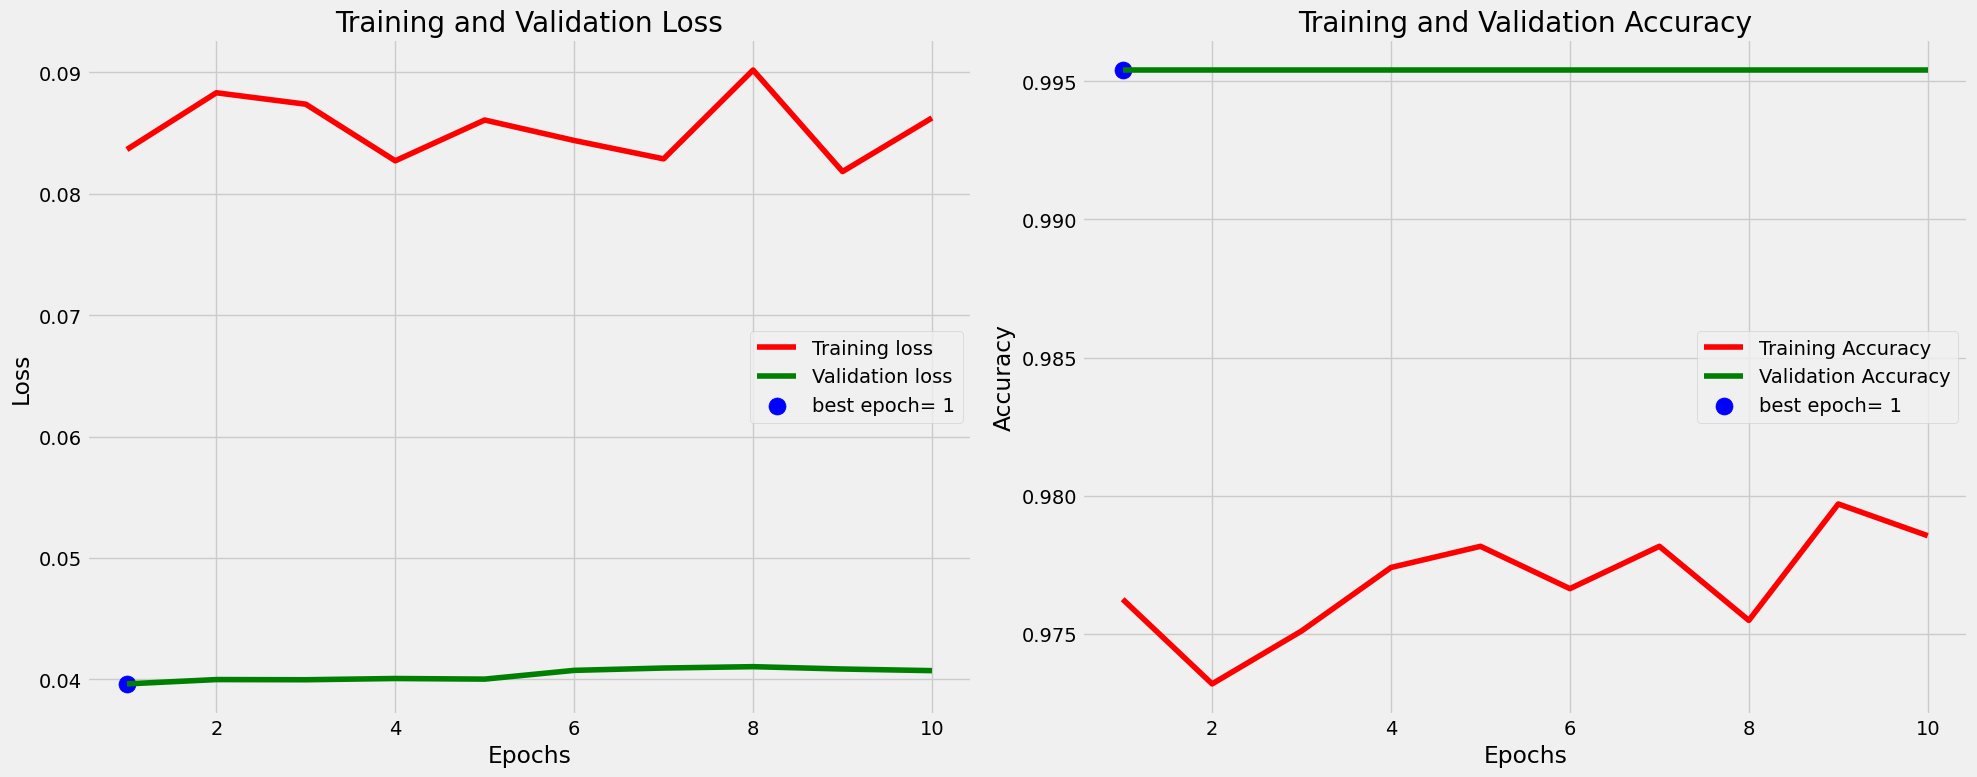

21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 789ms/step
Classification Report for Fold 4
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       179
           1       0.98      1.00      0.99       191
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00       192

    accuracy                           1.00       653
   macro avg       1.00      1.00      1.00       653
weighted avg       1.00      1.00      1.00       653

21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 800ms/step


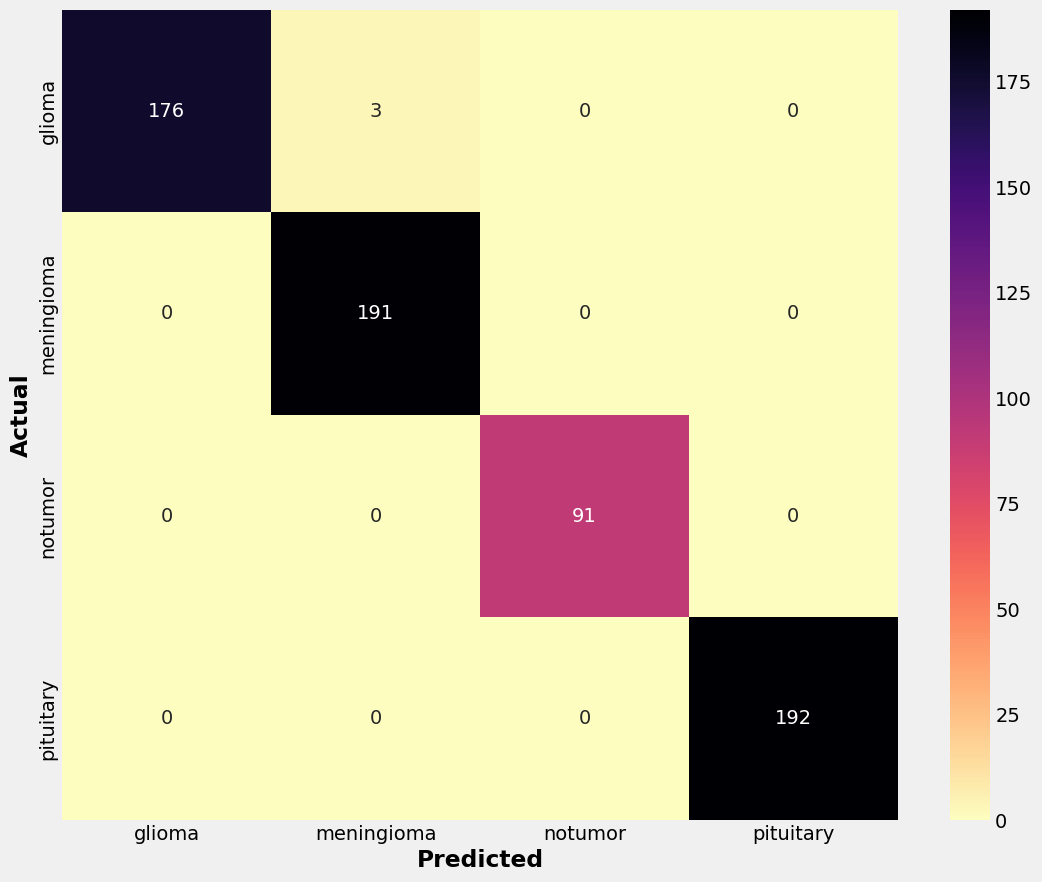

Fold 5/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9778 - loss: 0.0884 - val_accuracy: 0.9939 - val_loss: 0.0362 - learning_rate: 1.0000e-05
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9836 - loss: 0.0751 - val_accuracy: 0.9939 - val_loss: 0.0363 - learning_rate: 1.0000e-05
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9743 - loss: 0.0931 - val_accuracy: 0.9939 - val_loss: 0.0364 - learning_rate: 1.0000e-05
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9842 - loss: 0.0739 - val_accuracy: 0.9939 - val_loss: 0.0364 - learning_rate: 1.0000e-05
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9808 - loss: 0.0836 - val_accuracy: 0.9939 - val_loss: 0.0367 - learning_rate: 1.0000e-05
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9750 - loss: 0.0912 - val_accuracy: 0.9939 - val_loss: 0.0365 - learning_rate: 1.0000e-05
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.978

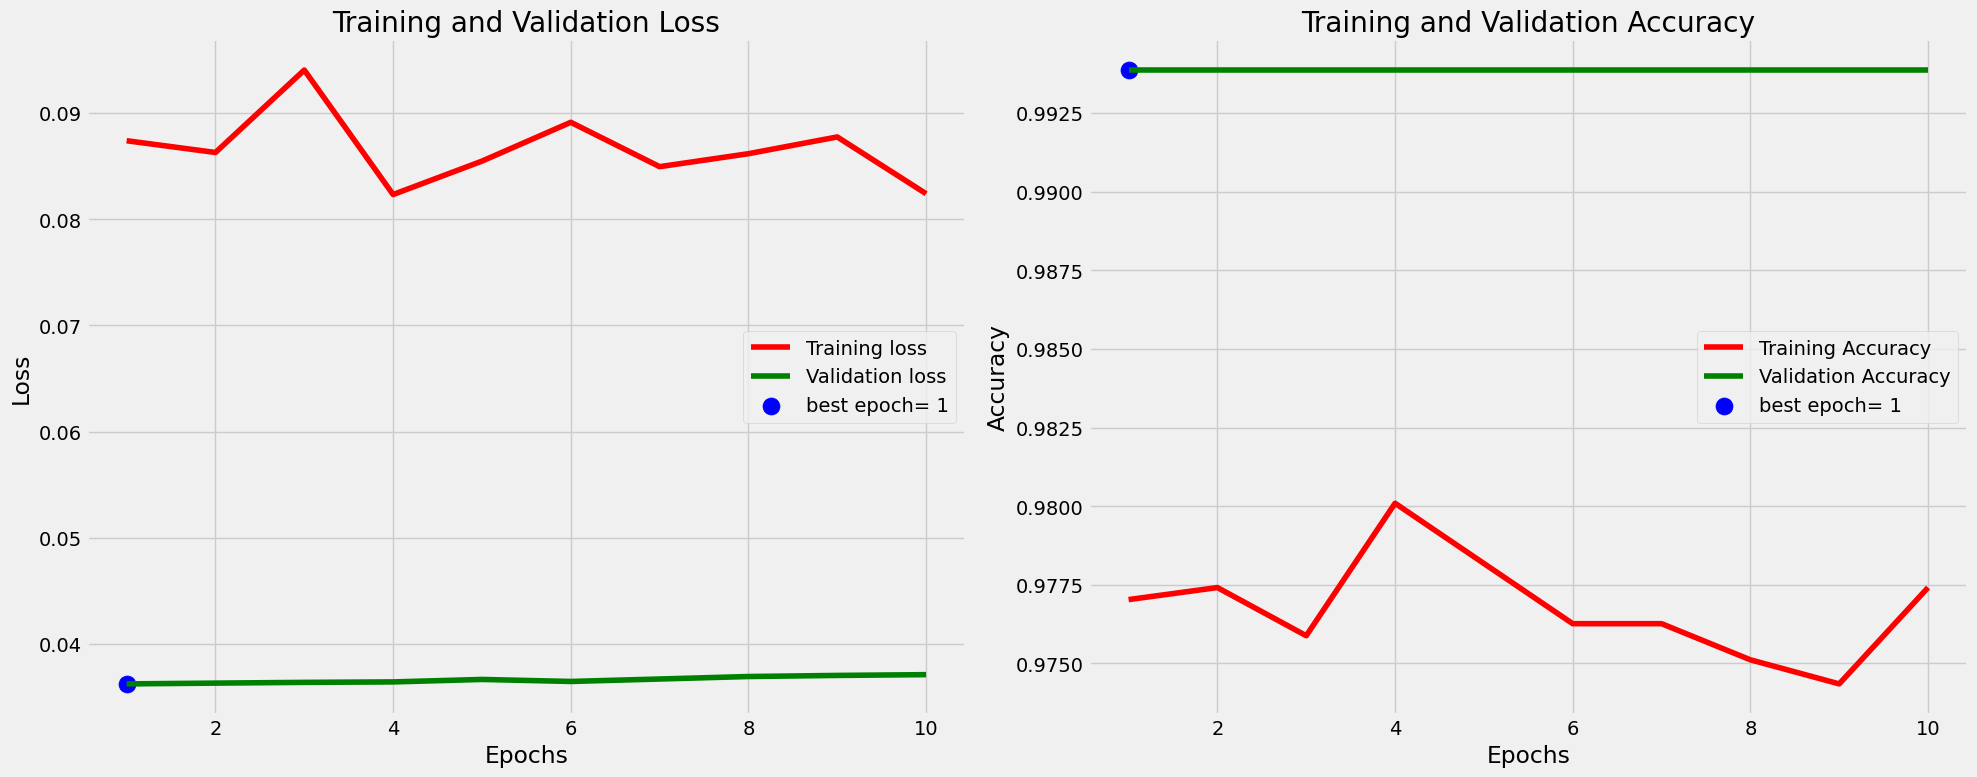

21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 802ms/step
Classification Report for Fold 5
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       185
           1       0.98      0.99      0.99       171
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00       199

    accuracy                           0.99       652
   macro avg       0.99      0.99      0.99       652
weighted avg       0.99      0.99      0.99       652

21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 794ms/step


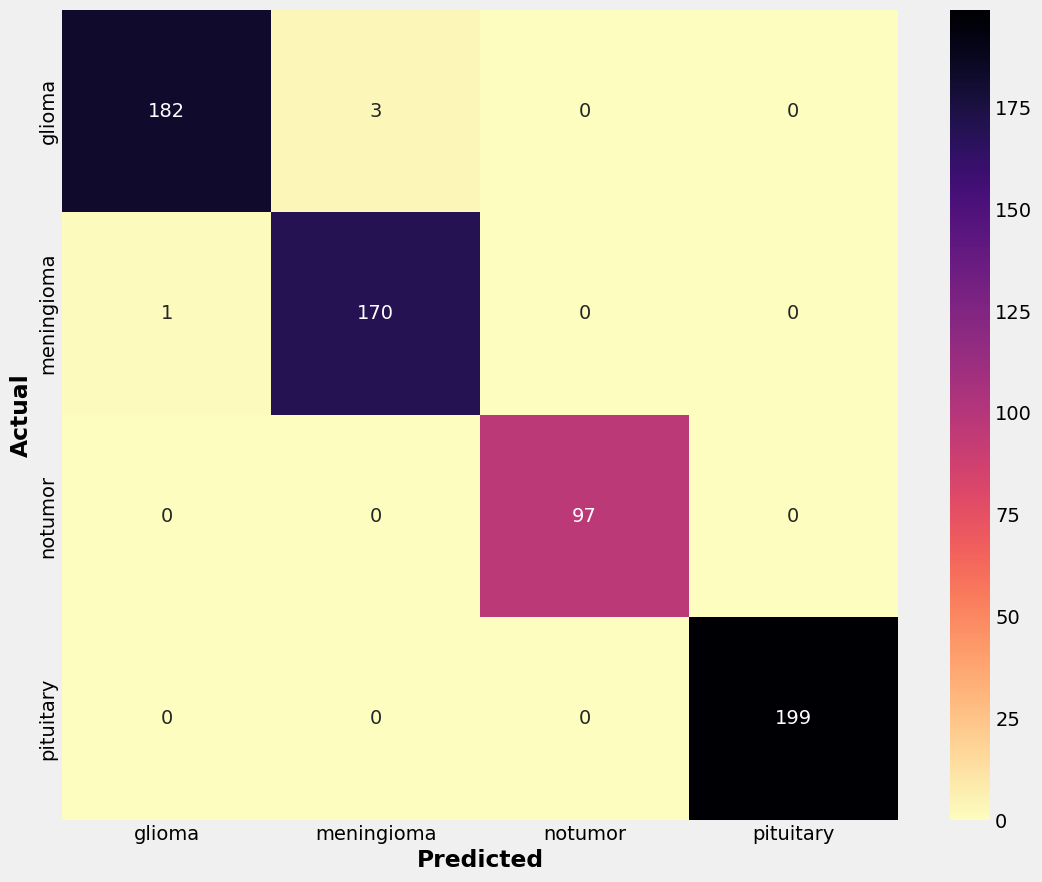

Total runtime of model: 137.15349884827933 Seconds


In [27]:
starting_time = time.time()   

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds) 

all_predictions = []
all_true_labels = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}/{num_folds}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_one_encoded[train_index], y_train_one_encoded[val_index]

    # Train the model on this fold
    history_Xception = model_Xception.fit(X_train_fold, y_train_fold, epochs=30, batch_size=64, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping, reduce_lr])

    # Evaluate the model on the validation fold
    scores = model_Xception.evaluate(X_val_fold, y_val_fold)
    print(f"Validation loss: {scores[0]}, Validation accuracy: {scores[1]}") 
    
    visualize_2(history_Xception)  
    # Generate predictions for the validation fold
    fold_predictions = np.argmax(model_Xception.predict(X_val_fold), axis=-1)
    fold_true_labels = np.argmax(y_val_fold, axis=-1)
    
    # Generate and print classification report for this fold
    fold_classification_report = classification_report(fold_true_labels, fold_predictions)
    print("Classification Report for Fold", fold + 1)
    print(fold_classification_report)
     
    y_pred = model_Xception.predict(X_val_fold)  # X_test_normalized
    y_pred = np.argmax(y_pred,axis=1)   
    
    y_test_new = np.argmax(y_val_fold,axis=1) 

    conf_matrix = confusion_matrix(y_test_new,y_pred) # x=y_test_new, y=y_pred

    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted', fontweight='bold')
    plt.ylabel('Actual', fontweight='bold')
    plt.show() 
    
ending_time = time.time()    

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Seconds") 

In [28]:
# Evaluation
val_loss, val_acc = model_Xception.evaluate(X_val_fold, y_val_fold)  # X_test_normalized, y_test_one_encoded
print("Validation Accuracy: {:.2f}%".format(val_acc * 100))
print("Validation Loss: {:.2f}%".format(val_loss * 100))

21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 777ms/step - accuracy: 0.9959 - loss: 0.0345
Validation Accuracy: 99.39%
Validation Loss: 3.67%


In [29]:
y_pred = model_Xception.predict(X_val_fold)  # X_test_normalized
y_pred = np.argmax(y_pred,axis=1) 

21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 776ms/step


In [30]:
y_test_new = np.argmax(y_val_fold,axis=1)

In [31]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       185
           1       0.98      0.99      0.99       171
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00       199

    accuracy                           0.99       652
   macro avg       0.99      0.99      0.99       652
weighted avg       0.99      0.99      0.99       652



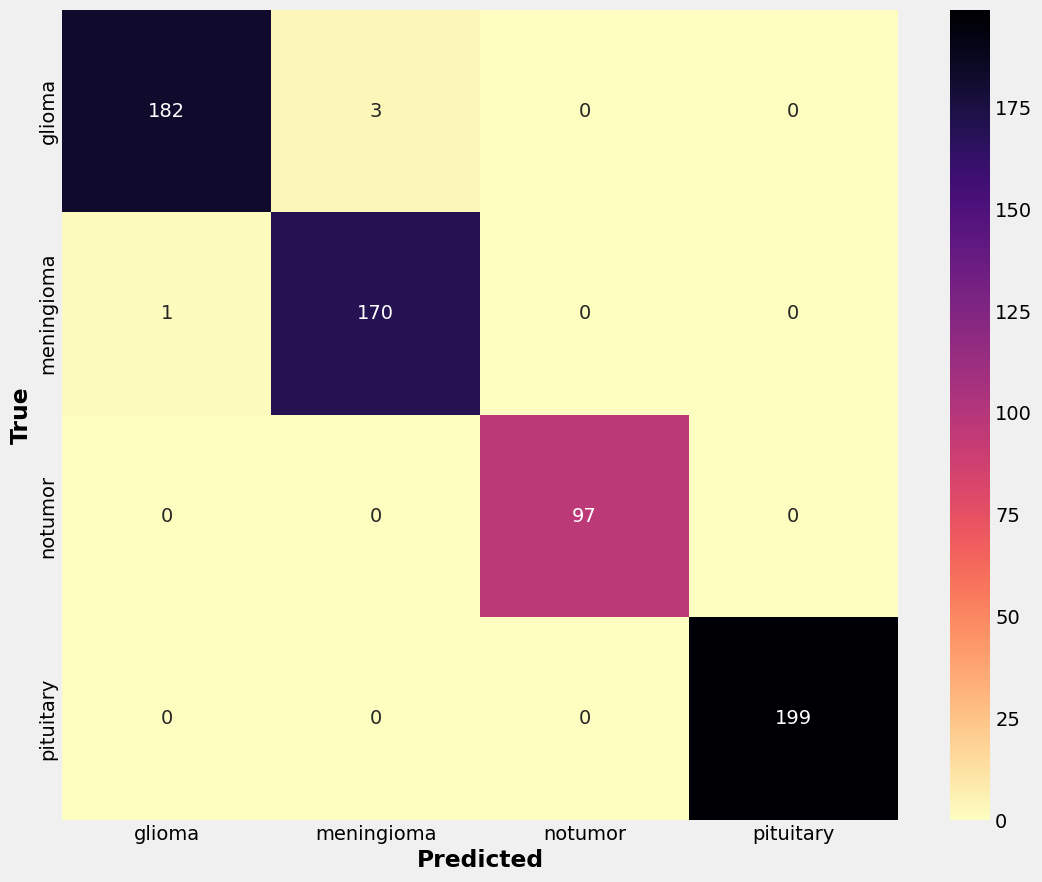

In [32]:
conf_matrix = confusion_matrix(y_test_new,y_pred) # x=y_test_new, y=y_pred

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.show() 

In [33]:
# saving the model 
save_model(model_Xception, 'saved_model_Xception_5K_lastone_1.keras') 

In [34]:
# Loading model 
model_modelXception = load_model('saved_model_Xception_5K_lastone_1.keras')

c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 318 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [35]:
second_last_layer_output = model_modelXception.layers[-2].output

feature_extractor_1 = Model(inputs=model_modelXception.input, outputs=second_last_layer_output)  

# feature_extractor_2.summary()

In [36]:
extracted_feature_Xception_Training = feature_extractor_1.predict(X_train_fold)

82/82 ━━━━━━━━━━━━━━━━━━━━ 66s 803ms/step


In [37]:
extracted_feature_Xception_Training.shape

(2612, 1024)

In [38]:
extracted_feature_Xception_Testing = feature_extractor_1.predict(X_val_fold)

21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 807ms/step


In [39]:
extracted_feature_Xception_Testing.shape

(652, 1024)

##  ////////////////////////////////////////////////////////////  InceptionV3  ///////////////////////////////////////////////////////////////

In [40]:
# Main model 
base_model_InceptionV3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

NUM_CLASSES = 4    

# early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)  

# Freeze the layers in the base model
for layer in base_model_InceptionV3.layers:
    layer.trainable = False

# add global average pooling layer
x = base_model_InceptionV3.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x) 

# output layer
outputlayer_Inceptionv3 = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)   

# Create the final model
model_InceptionV3 = Model(inputs=base_model_InceptionV3.input, outputs=outputlayer_Inceptionv3)

# Compile the model
model_InceptionV3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

Fold 1/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.3164 - loss: 34.9515 - val_accuracy: 0.5360 - val_loss: 3.7985 - learning_rate: 0.0010
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 975ms/step - accuracy: 0.5298 - loss: 2.5216 - val_accuracy: 0.4747 - val_loss: 2.4752 - learning_rate: 0.0010
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6163 - loss: 1.5129 - val_accuracy: 0.6095 - val_loss: 1.6427 - learning_rate: 0.0010
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6728 - loss: 1.0821 - val_accuracy: 0.5972 - val_loss: 1.4845 - learning_rate: 0.0010
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6974 - loss: 0.8911 - val_accuracy: 0.7550 - val_loss: 0.7597 - learning_rate: 0.0010
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8094 - loss: 0.5551 - val_accuracy: 0.5835 - val_loss: 1.6702 - learning_rate: 0.0010
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7070 - loss: 0.9519 - v

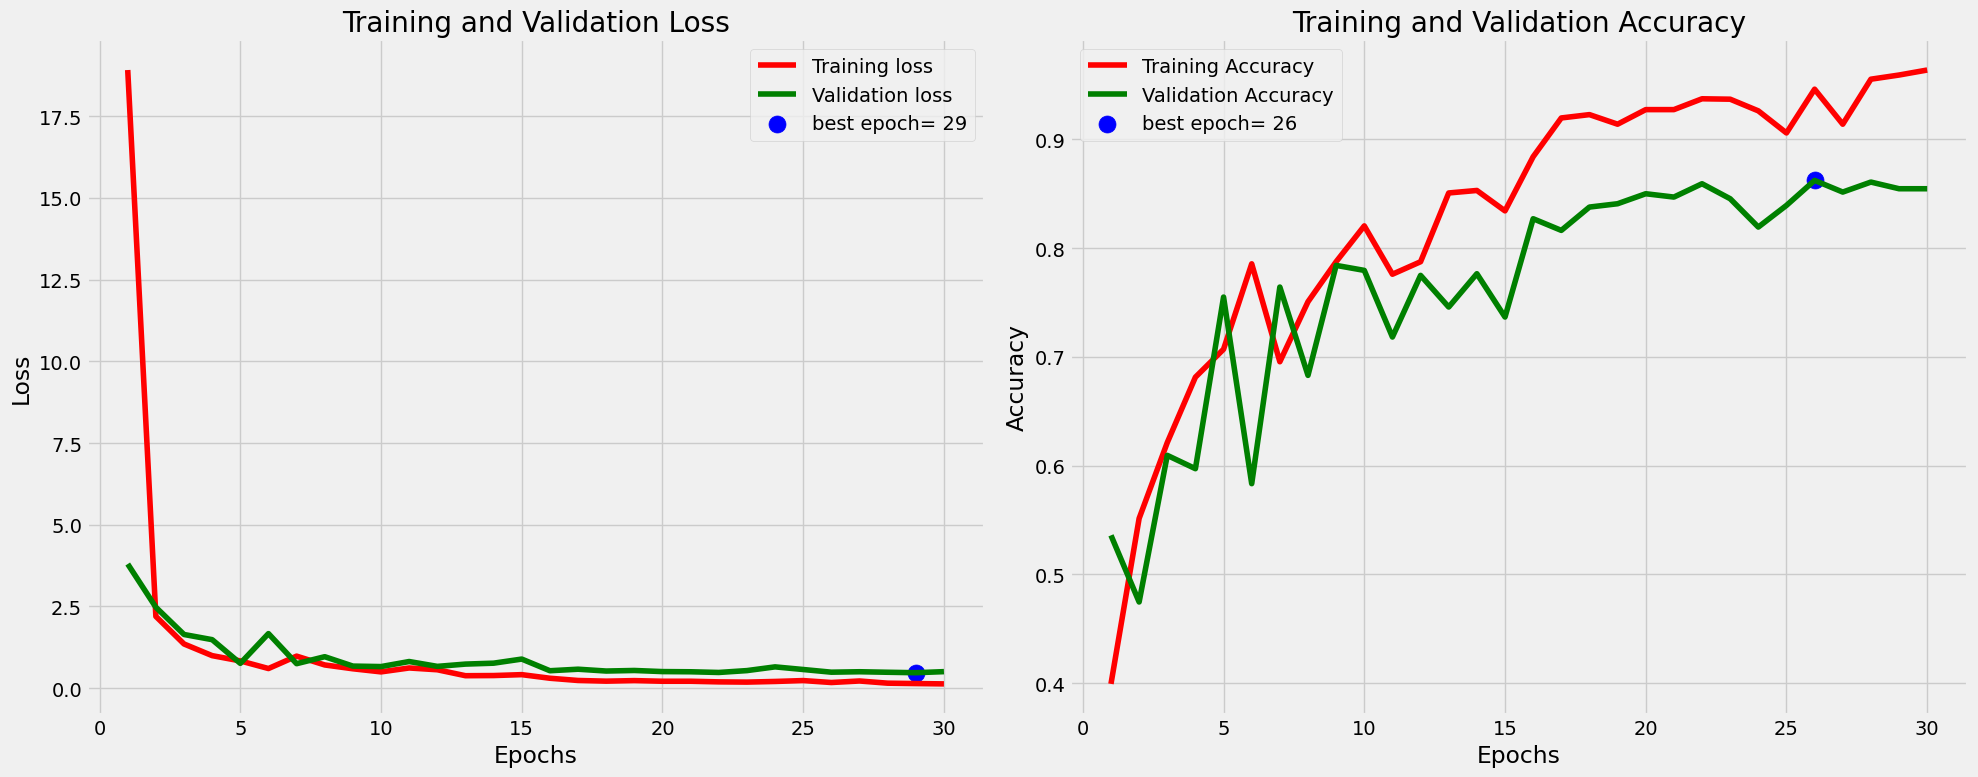

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 396ms/step - accuracy: 0.8508 - loss: 0.4931
Validation loss: 0.46903878450393677, Validation accuracy: 0.8545176386833191
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 435ms/step
Classification Report for Fold 1
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       198
           1       0.87      0.74      0.80       193
           2       0.86      0.91      0.88        97
           3       0.88      0.97      0.92       165

    accuracy                           0.85       653
   macro avg       0.86      0.87      0.86       653
weighted avg       0.86      0.85      0.85       653

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 388ms/step


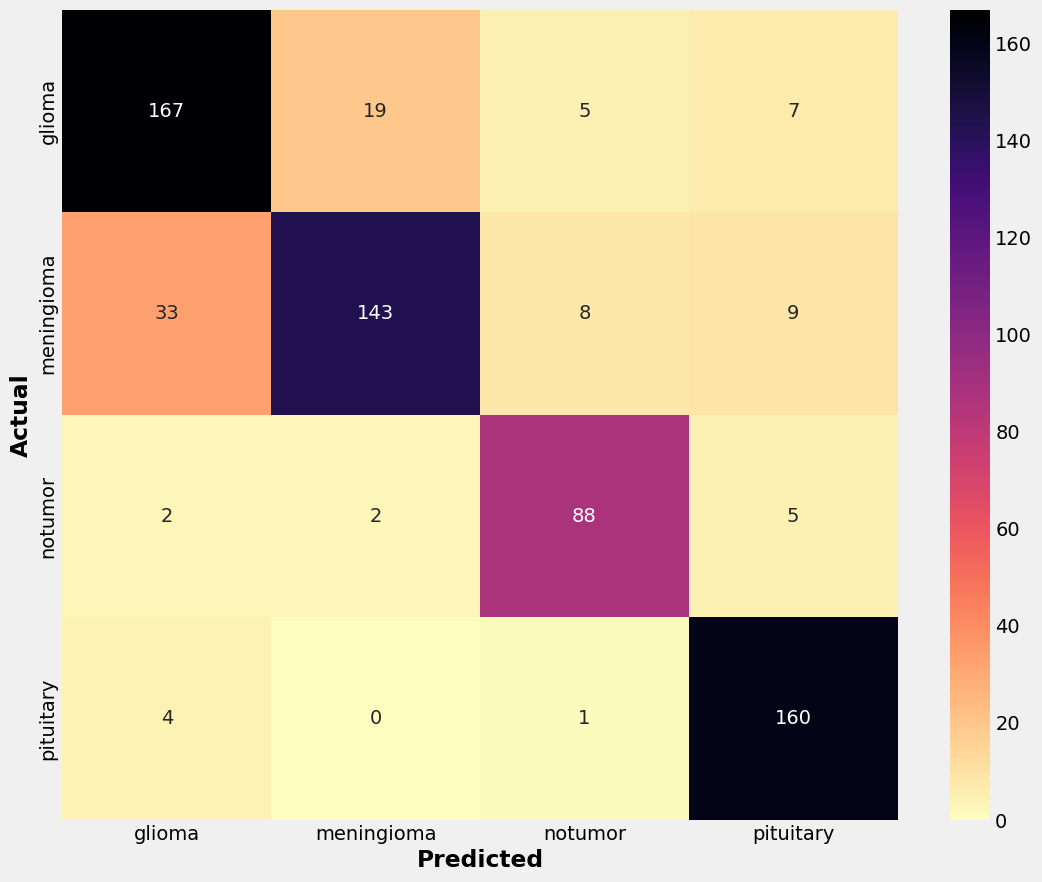

Fold 2/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9270 - loss: 0.2443 - val_accuracy: 0.9678 - val_loss: 0.1284 - learning_rate: 2.5000e-04
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 998ms/step - accuracy: 0.9329 - loss: 0.2107 - val_accuracy: 0.9464 - val_loss: 0.1758 - learning_rate: 2.5000e-04
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9275 - loss: 0.2240 - val_accuracy: 0.9464 - val_loss: 0.1694 - learning_rate: 2.5000e-04
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9339 - loss: 0.1999 - val_accuracy: 0.9694 - val_loss: 0.1331 - learning_rate: 2.5000e-04
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9365 - loss: 0.2006 - val_accuracy: 0.9571 - val_loss: 0.1511 - learning_rate: 2.5000e-04
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9387 - loss: 0.2023 - val_accuracy: 0.9632 - val_loss: 0.1450 - learning_rate: 2.5000e-04
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.

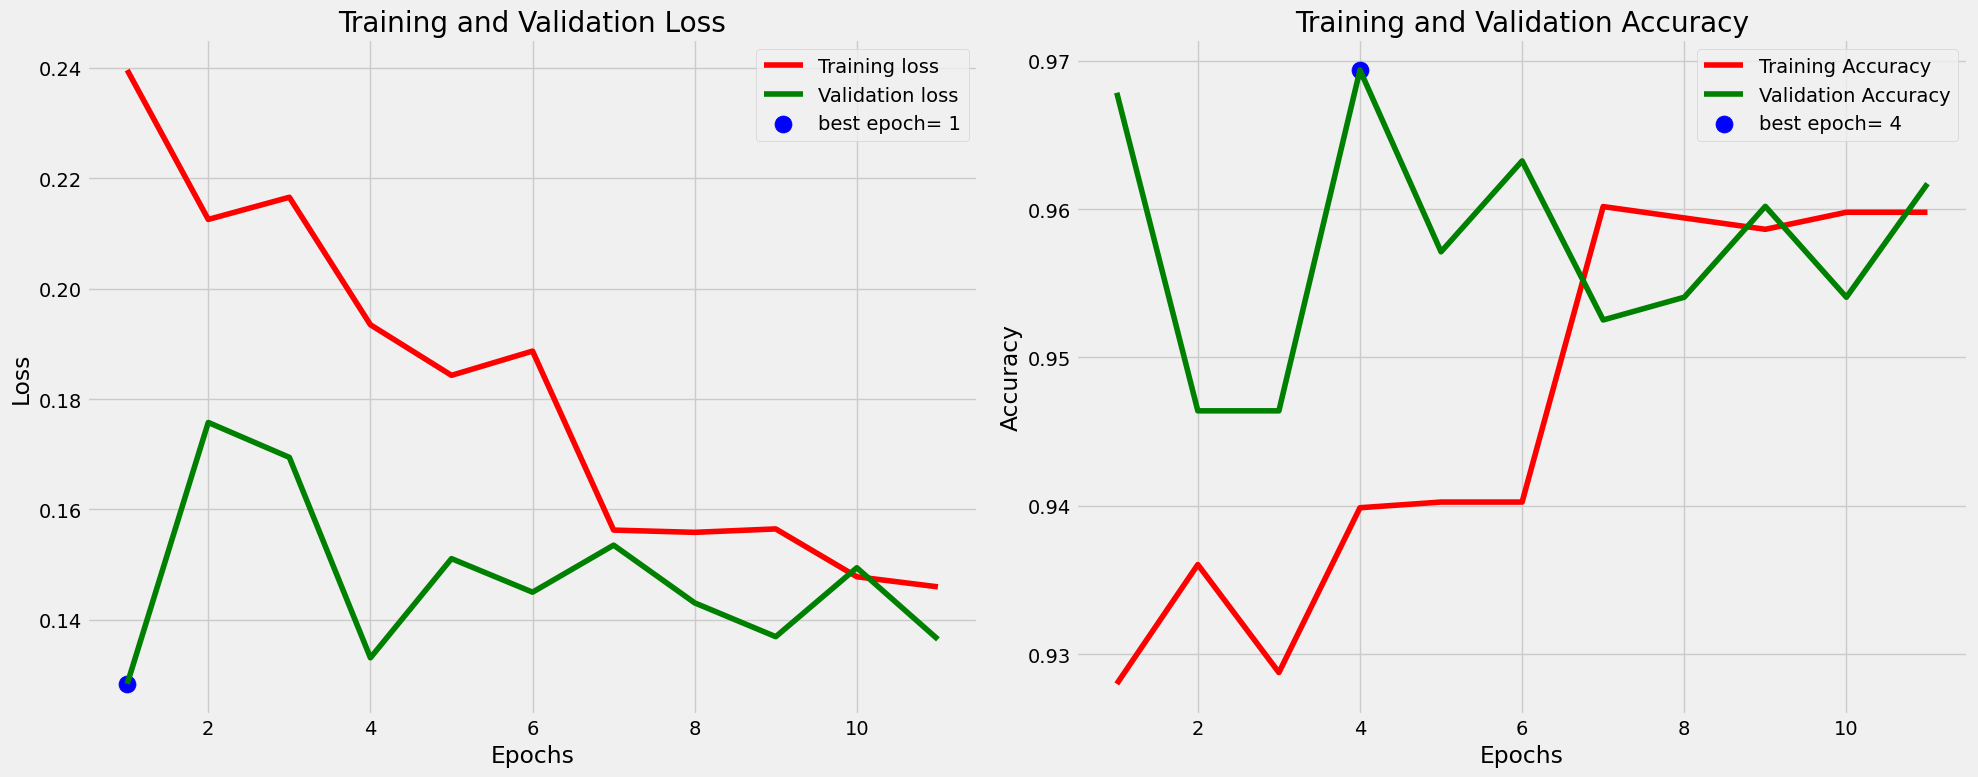

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 389ms/step - accuracy: 0.9590 - loss: 0.1374
Validation loss: 0.12943169474601746, Validation accuracy: 0.9678407311439514
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 389ms/step
Classification Report for Fold 2
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       190
           1       0.97      0.93      0.95       198
           2       0.99      0.99      0.99       105
           3       0.96      1.00      0.98       160

    accuracy                           0.97       653
   macro avg       0.97      0.97      0.97       653
weighted avg       0.97      0.97      0.97       653

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 389ms/step


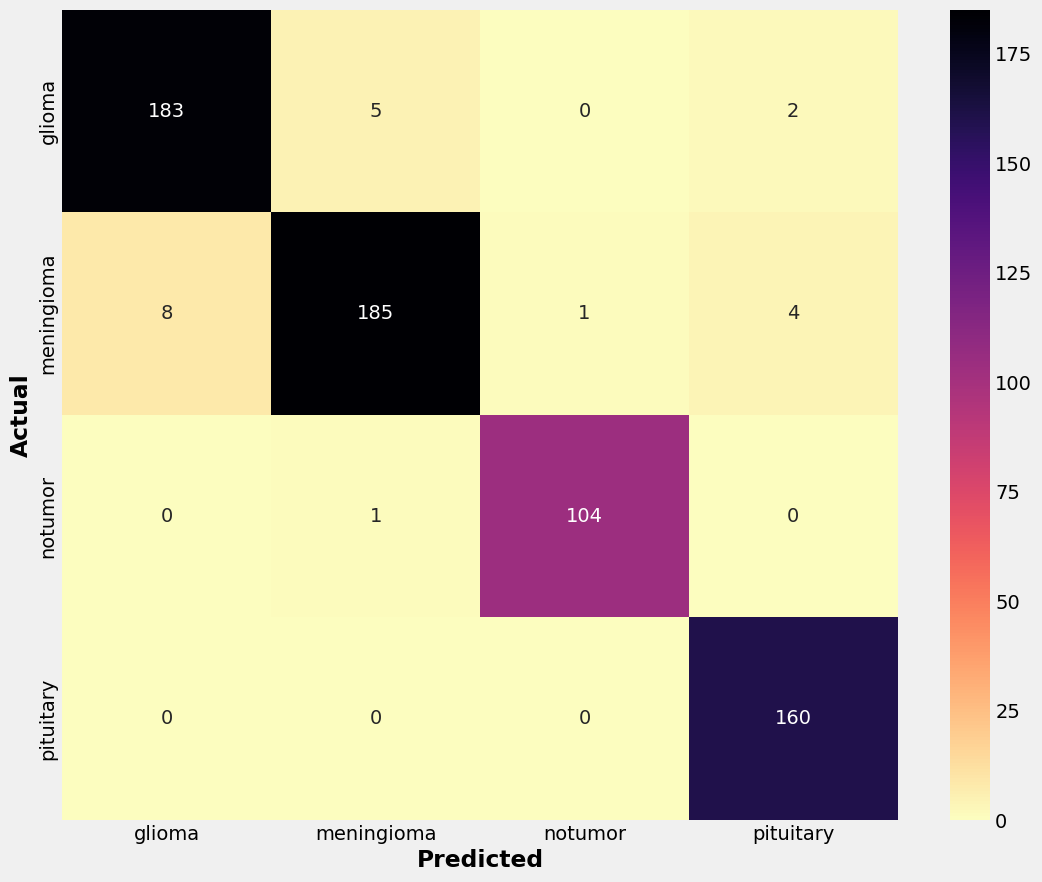

Fold 3/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9428 - loss: 0.2078 - val_accuracy: 0.9816 - val_loss: 0.1068 - learning_rate: 6.2500e-05
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9417 - loss: 0.2088 - val_accuracy: 0.9770 - val_loss: 0.1085 - learning_rate: 6.2500e-05
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9430 - loss: 0.2052 - val_accuracy: 0.9694 - val_loss: 0.1223 - learning_rate: 6.2500e-05
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9469 - loss: 0.1933 - val_accuracy: 0.9755 - val_loss: 0.1178 - learning_rate: 6.2500e-05
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9429 - loss: 0.1976 - val_accuracy: 0.9740 - val_loss: 0.1113 - learning_rate: 6.2500e-05
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9483 - loss: 0.1794 - val_accuracy: 0.9724 - val_loss: 0.1145 - learning_rate: 6.2500e-05
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.955

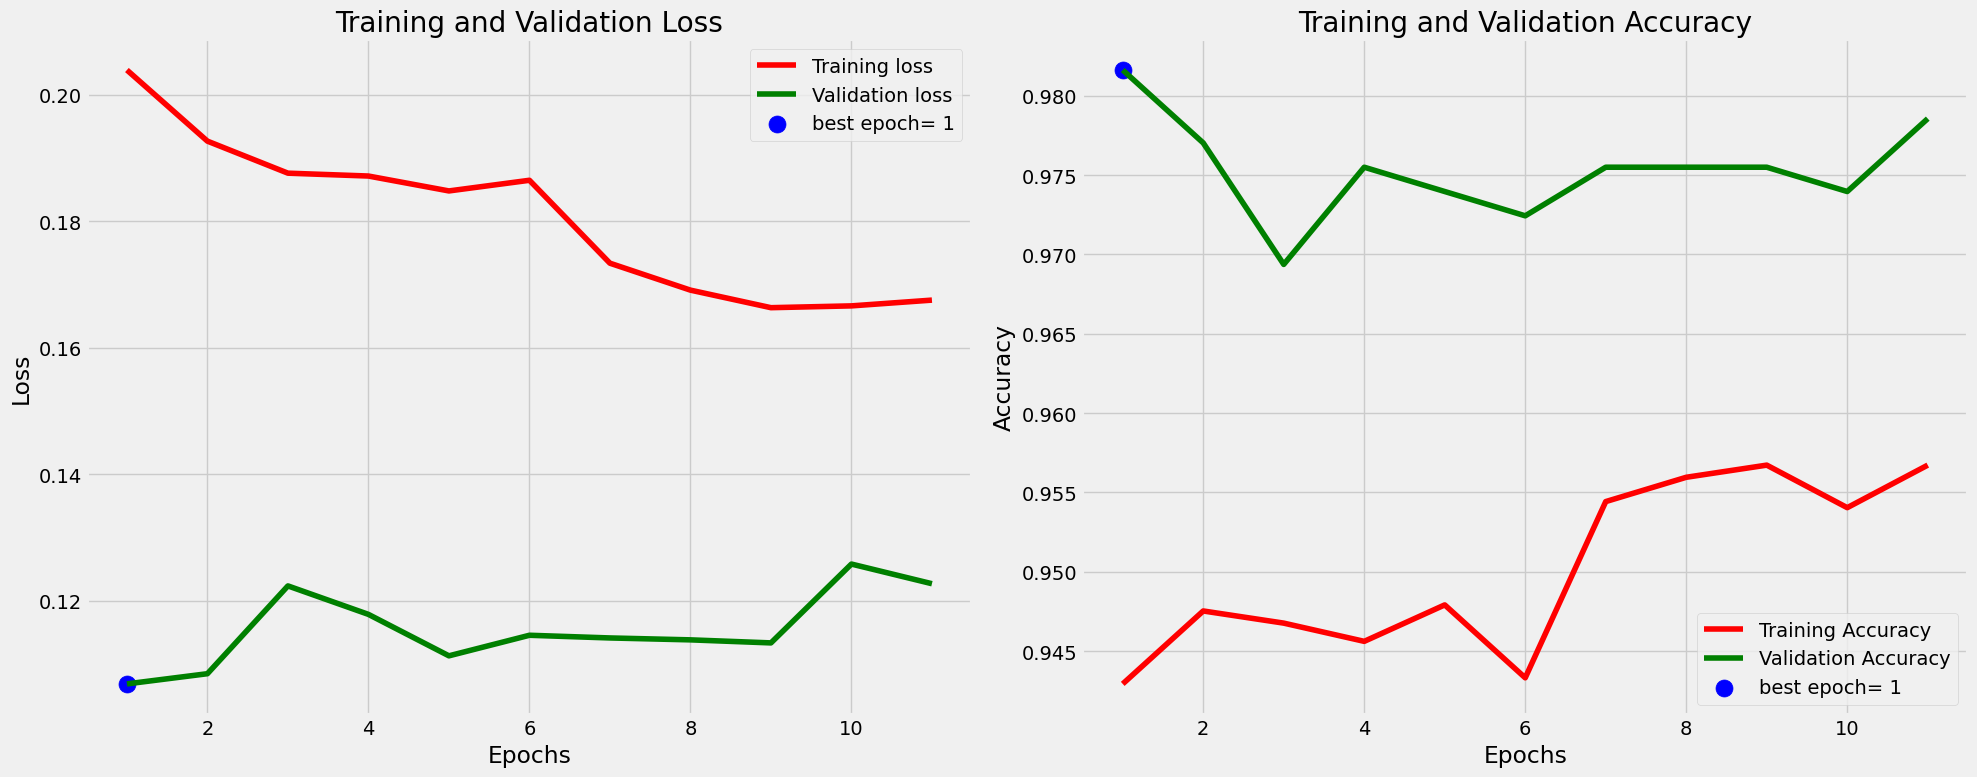

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 397ms/step - accuracy: 0.9877 - loss: 0.0971
Validation loss: 0.10504816472530365, Validation accuracy: 0.9816232919692993
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 395ms/step
Classification Report for Fold 3
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       174
           1       0.96      0.98      0.97       184
           2       1.00      1.00      1.00       110
           3       0.99      1.00      1.00       185

    accuracy                           0.98       653
   macro avg       0.98      0.98      0.98       653
weighted avg       0.98      0.98      0.98       653

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 395ms/step


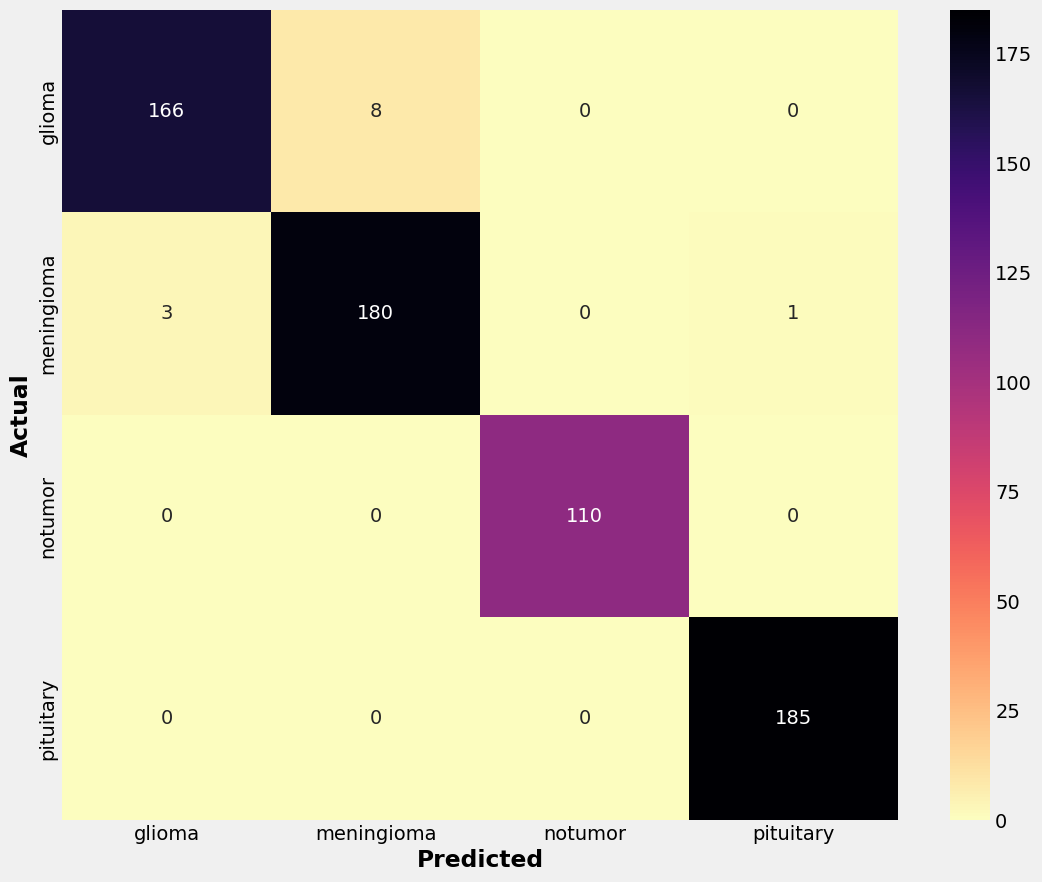

Fold 4/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9551 - loss: 0.1866 - val_accuracy: 0.9678 - val_loss: 0.1368 - learning_rate: 1.5625e-05
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9564 - loss: 0.1914 - val_accuracy: 0.9663 - val_loss: 0.1376 - learning_rate: 1.5625e-05
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9552 - loss: 0.1722 - val_accuracy: 0.9740 - val_loss: 0.1390 - learning_rate: 1.5625e-05
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9608 - loss: 0.1703 - val_accuracy: 0.9663 - val_loss: 0.1376 - learning_rate: 1.5625e-05
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9532 - loss: 0.1867 - val_accuracy: 0.9632 - val_loss: 0.1382 - learning_rate: 1.5625e-05
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9557 - loss: 0.1627 - val_accuracy: 0.9709 - val_loss: 0.1412 - learning_rate: 1.5625e-05
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.951

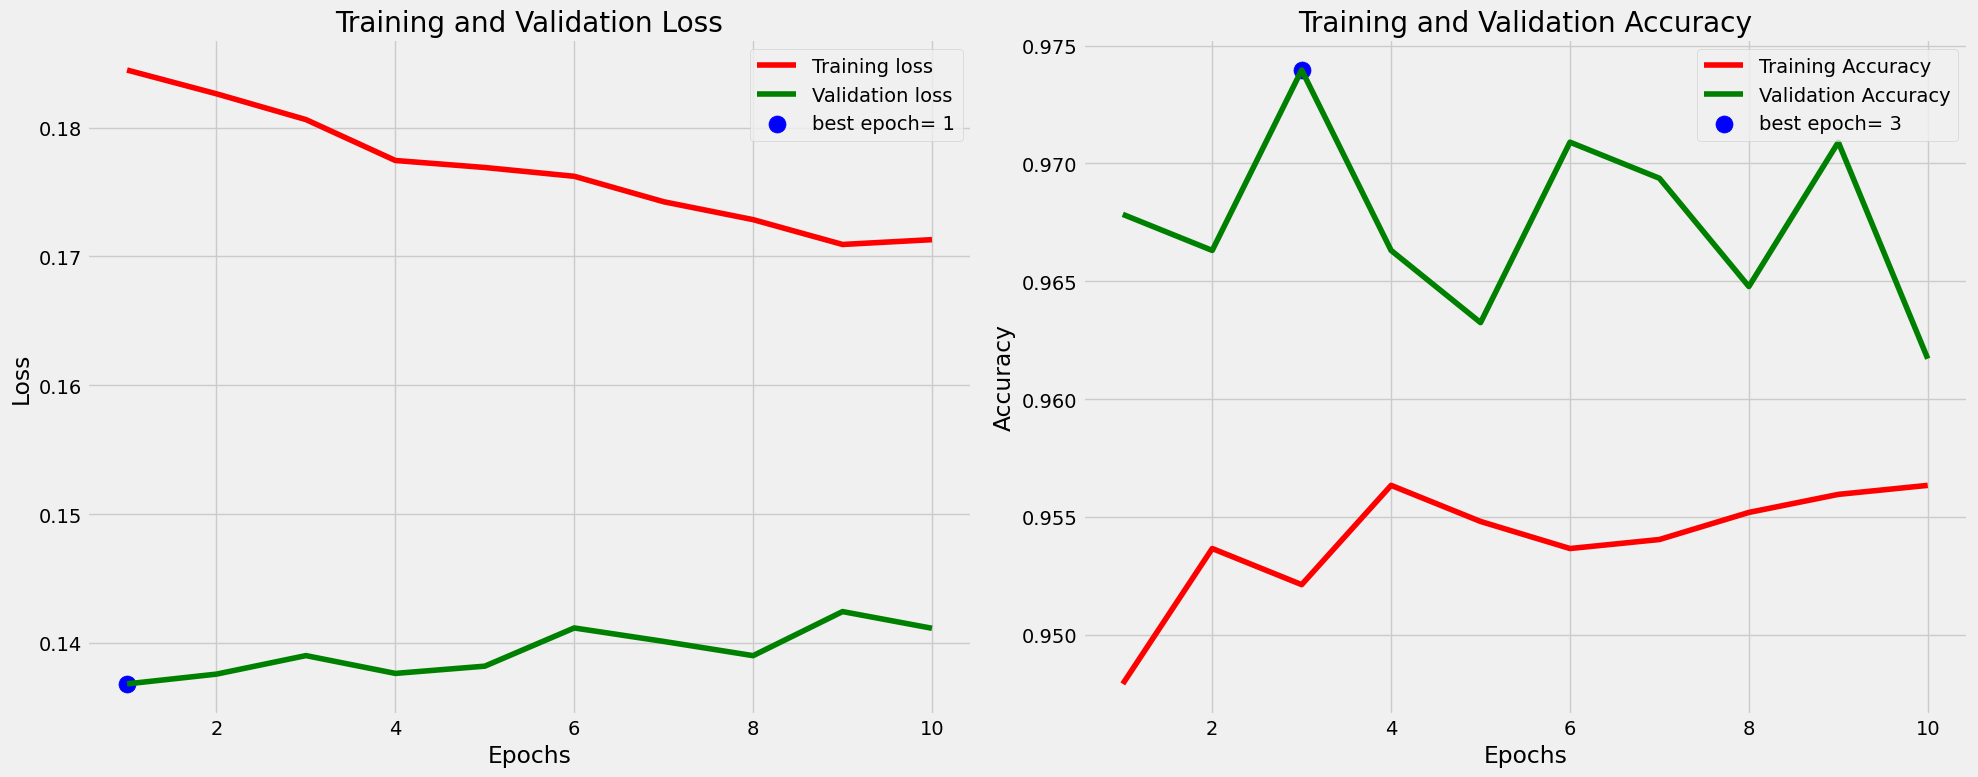

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 399ms/step - accuracy: 0.9636 - loss: 0.1274
Validation loss: 0.131513774394989, Validation accuracy: 0.9678407311439514
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 393ms/step
Classification Report for Fold 4
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       179
           1       0.96      0.94      0.95       191
           2       0.98      1.00      0.99        91
           3       0.99      0.99      0.99       192

    accuracy                           0.97       653
   macro avg       0.97      0.97      0.97       653
weighted avg       0.97      0.97      0.97       653

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 402ms/step


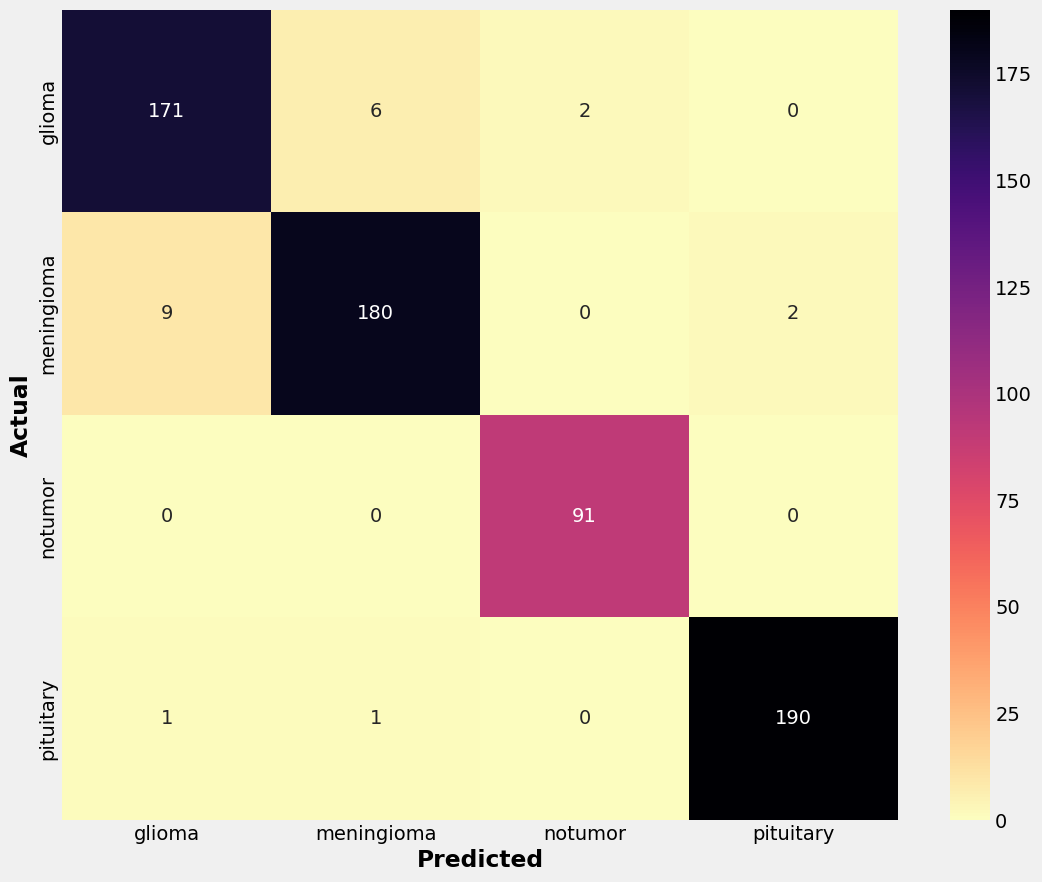

Fold 5/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9435 - loss: 0.1812 - val_accuracy: 0.9663 - val_loss: 0.1320 - learning_rate: 1.0000e-05
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9497 - loss: 0.1855 - val_accuracy: 0.9632 - val_loss: 0.1308 - learning_rate: 1.0000e-05
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9506 - loss: 0.1760 - val_accuracy: 0.9663 - val_loss: 0.1340 - learning_rate: 1.0000e-05
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9572 - loss: 0.1815 - val_accuracy: 0.9617 - val_loss: 0.1387 - learning_rate: 1.0000e-05
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9532 - loss: 0.1796 - val_accuracy: 0.9663 - val_loss: 0.1363 - learning_rate: 1.0000e-05
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9555 - loss: 0.1770 - val_accuracy: 0.9632 - val_loss: 0.1343 - learning_rate: 1.0000e-05
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.959

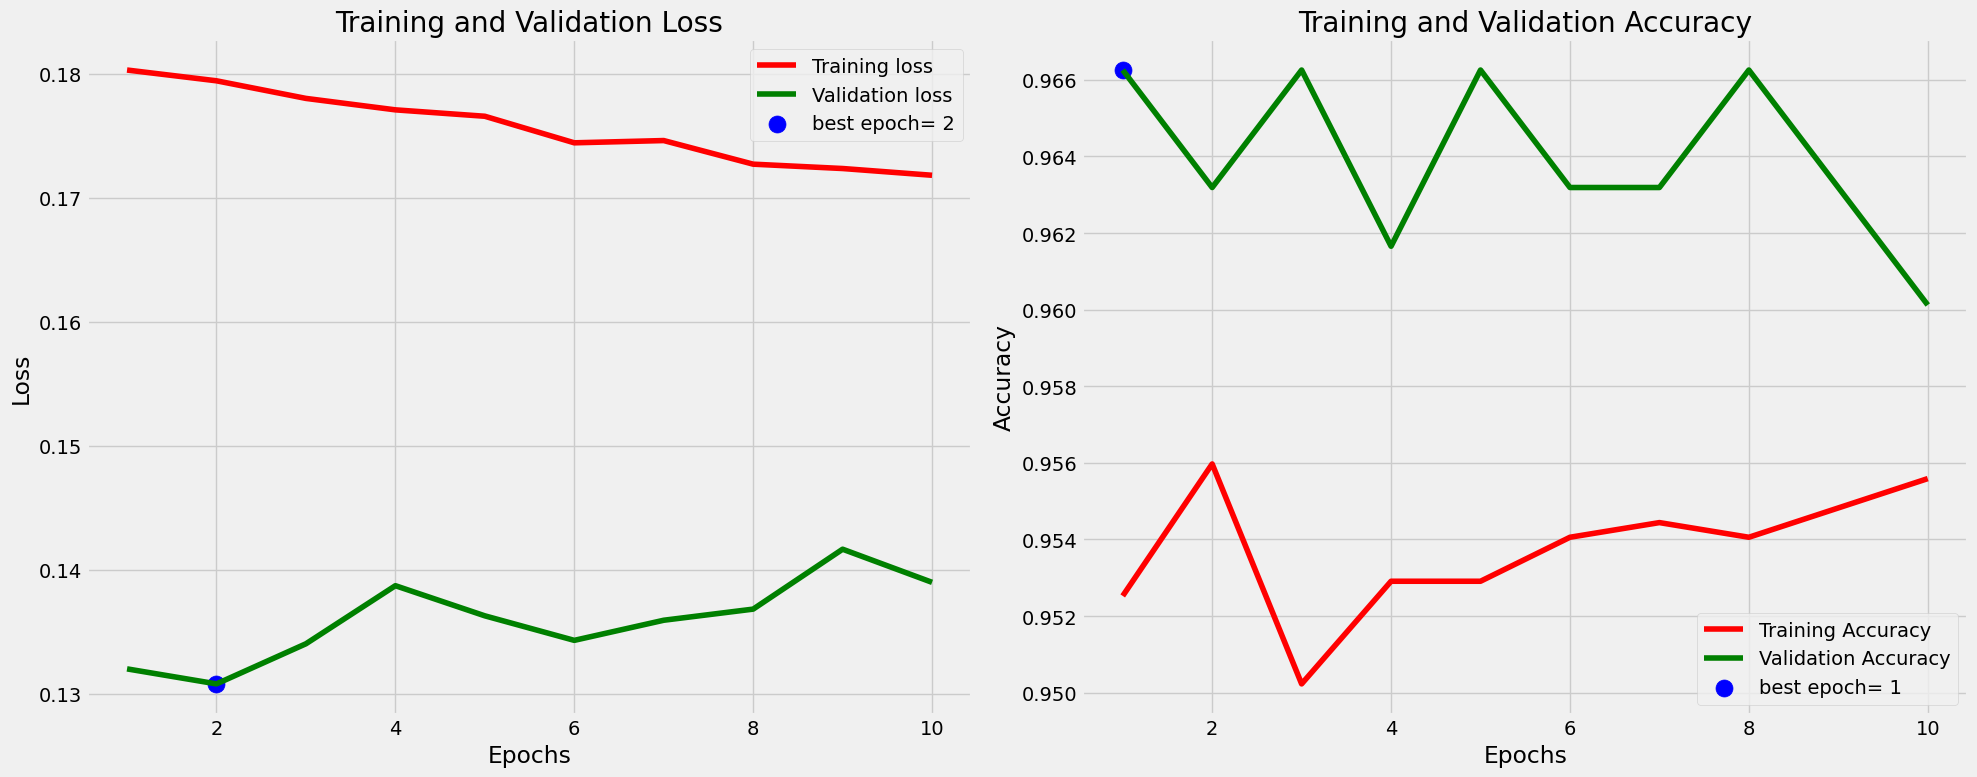

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 391ms/step - accuracy: 0.9725 - loss: 0.1255
Validation loss: 0.13085520267486572, Validation accuracy: 0.9662576913833618
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 388ms/step
Classification Report for Fold 5
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       185
           1       0.94      0.94      0.94       171
           2       1.00      1.00      1.00        97
           3       0.99      0.98      0.99       199

    accuracy                           0.97       652
   macro avg       0.97      0.97      0.97       652
weighted avg       0.97      0.97      0.97       652

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 393ms/step


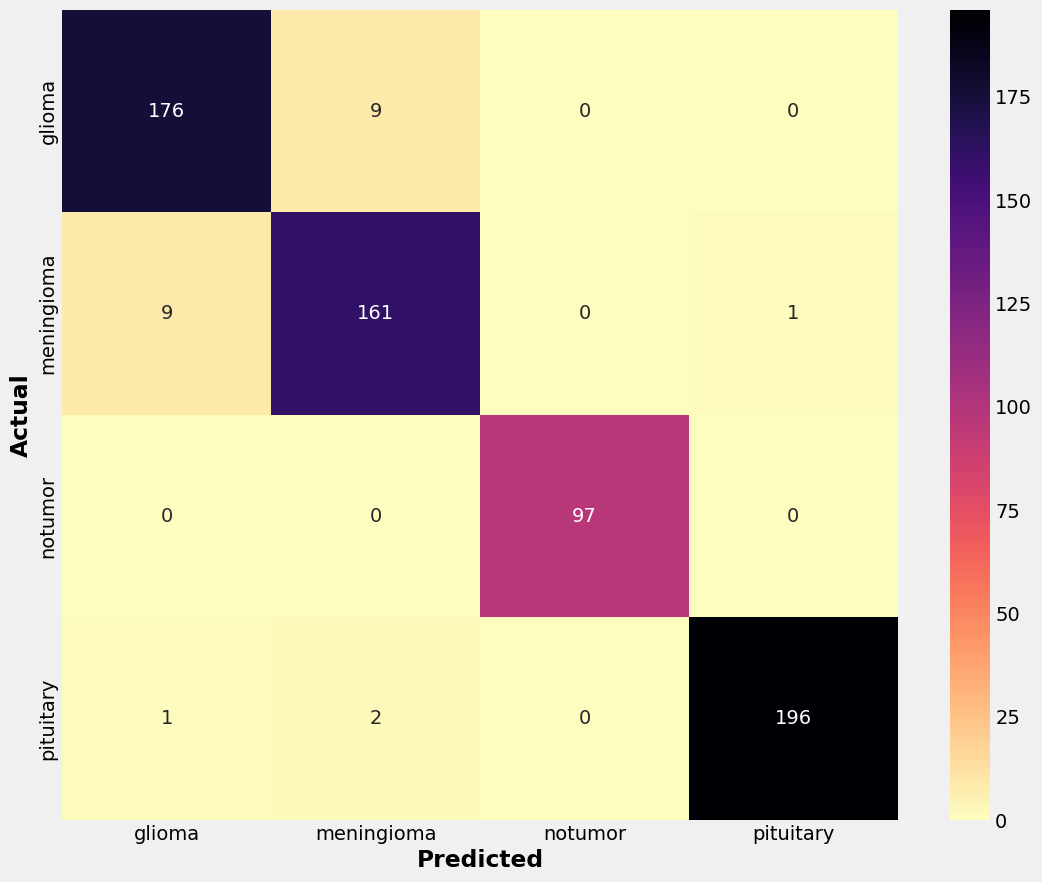

Total runtime of model: 51.931922237078346 Seconds


In [41]:
starting_time = time.time()   

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds) 

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}/{num_folds}")
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_one_encoded[train_index], y_train_one_encoded[val_index]

    # Train the model on this fold
    history_InceptionV3 = model_InceptionV3.fit(X_train_fold, y_train_fold, epochs=30, batch_size=64, validation_data=(X_val_fold, y_val_fold),callbacks=[early_stopping, reduce_lr] )


    visualize_2(history_InceptionV3) 
    # Evaluate the model on the validation fold
    scores = model_InceptionV3.evaluate(X_val_fold, y_val_fold)
    print(f"Validation loss: {scores[0]}, Validation accuracy: {scores[1]}") 
     
    
    # Generate predictions for the validation fold
    fold_predictions_1 = np.argmax(model_InceptionV3.predict(X_val_fold), axis=-1)
    fold_true_labels_1 = np.argmax(y_val_fold, axis=-1)
    
    # Generate and print classification report for this fold
    fold_classification_report = classification_report(fold_true_labels_1, fold_predictions_1)
    print("Classification Report for Fold", fold + 1)
    print(fold_classification_report)

    y_pred = model_InceptionV3.predict(X_val_fold)  # X_test_normalized
    y_pred = np.argmax(y_pred,axis=1)  
    y_test_new = np.argmax(y_val_fold,axis=1) 

    conf_matrix = confusion_matrix(y_test_new,y_pred) # x=y_test_new, y=y_pred

    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted', fontweight='bold')
    plt.ylabel('Actual', fontweight='bold')
    plt.show() 
    
ending_time = time.time()    

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Seconds") 

In [28]:
# Evaluation
val_loss, val_acc = model_InceptionV3.evaluate(X_val_fold, y_val_fold)  # X_test_normalized, y_test_one_encoded
print("Validation Accuracy: {:.2f}%".format(val_acc * 100))
print("Validation Loss: {:.2f}%".format(val_loss * 100))

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 379ms/step - accuracy: 0.9862 - loss: 0.0859
Validation Accuracy: 98.47%
Validation Loss: 8.68%


In [29]:
y_pred = model_InceptionV3.predict(X_val_fold)  # X_test_normalized
y_pred = np.argmax(y_pred,axis=1) 

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 381ms/step


In [30]:
y_test_new = np.argmax(y_val_fold,axis=1)

In [31]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       185
           1       0.96      0.98      0.97       171
           2       1.00      1.00      1.00        97
           3       1.00      0.99      1.00       199

    accuracy                           0.98       652
   macro avg       0.99      0.99      0.99       652
weighted avg       0.98      0.98      0.98       652



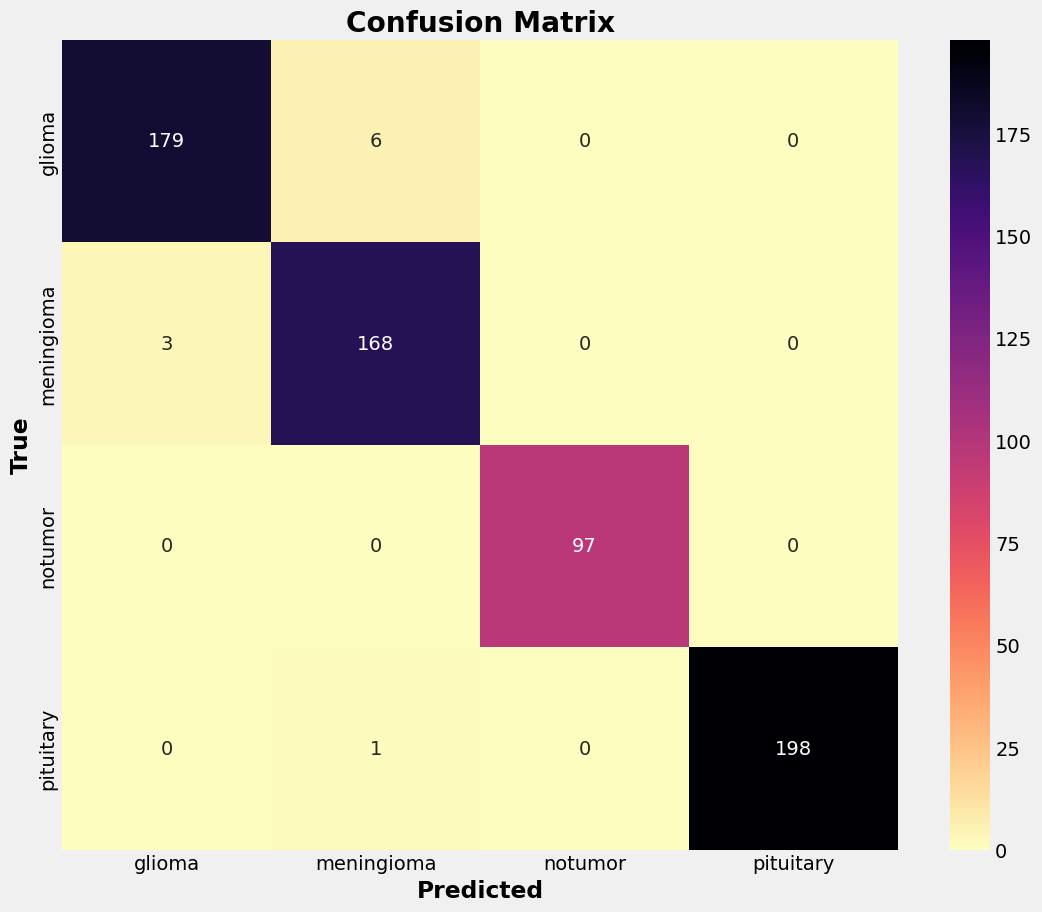

In [32]:
conf_matrix = confusion_matrix(y_test_new,y_pred) # x=y_test_new, y=y_pred

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.show() 

In [42]:
# saving the model 
save_model(model_InceptionV3, 'saved_model_InceptionV3_5K_lastone_1.keras') 

In [43]:
# Loading model 
model_modelInceptionV3 = load_model('saved_model_InceptionV3_5K_lastone_1.keras')

c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 386 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [44]:
second_last_layer_output = model_modelInceptionV3.layers[-2].output

feature_extractor_2 = Model(inputs=model_modelInceptionV3.input, outputs=second_last_layer_output)  

# feature_extractor_2.summary()

In [45]:
extracted_feature_InceptionV3_Training = feature_extractor_2.predict(X_train_fold)

82/82 ━━━━━━━━━━━━━━━━━━━━ 34s 398ms/step


In [46]:
extracted_feature_InceptionV3_Training.shape

(2612, 1024)

In [47]:
extracted_feature_InceptionV3_Testing = feature_extractor_2.predict(X_val_fold)

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 386ms/step


In [48]:
extracted_feature_InceptionV3_Testing.shape

(652, 1024)

##  /////////////////////////////////////////////////  DenseNet121  ////////////////////////////////////////////////////

## Resizing the images

In [49]:
labels = ['glioma','meningioma','notumor','pituitary']    

X_train = []
y_train = []
image_size = 224

for i in labels:
    folderPath = os.path.join('./DataSet_2','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('./DataSet_2','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train_1 = np.array(X_train)
y_train_1 = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 350.56it/s]


In [50]:
X_train_1, y_train_1 = shuffle(X_train_1,y_train_1, random_state=101) 

In [51]:
labels = ['glioma','meningioma','notumor','pituitary']    
label_to_index = {labels: index for index, labels in enumerate(labels)}
y_train_indices = np.array([label_to_index[labels] for labels in y_train_1])

# Convert indices to one-hot encoded vectors
y_train_one_encoded_1 = tf.keras.utils.to_categorical(y_train_indices, num_classes=len(labels))

In [52]:
# Define base model
base_model_DenseNet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

NUM_CLASSES = 4 

# early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)  
 
# Freeze the layers of the base model
for layer in base_model_DenseNet121.layers:
    layer.trainable = False  

# Add global average pooling layer
x = base_model_DenseNet121.output
x = GlobalAveragePooling2D()(x)

# Fully connected layer
x = Dense(1024, activation='relu')(x)   

# Add dropout layer
x = tf.keras.layers.Dropout(0.5)(x)  # 0.5 is the dropout rate
# Output layer
output_layer_DenseNet121 = Dense(NUM_CLASSES, activation='softmax')(x)  

# Combine model
model_DenseNet121 = Model(inputs=base_model_DenseNet121.input, outputs=output_layer_DenseNet121)

# Compile the model
model_DenseNet121.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fold 1/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 976ms/step - accuracy: 0.3948 - loss: 3.8851 - val_accuracy: 0.6064 - val_loss: 0.9645 - learning_rate: 0.0010
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 917ms/step - accuracy: 0.6070 - loss: 1.1008 - val_accuracy: 0.7213 - val_loss: 0.7442 - learning_rate: 0.0010
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 917ms/step - accuracy: 0.6698 - loss: 0.8174 - val_accuracy: 0.7443 - val_loss: 0.6656 - learning_rate: 0.0010
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 933ms/step - accuracy: 0.7404 - loss: 0.6891 - val_accuracy: 0.7657 - val_loss: 0.6535 - learning_rate: 0.0010
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 929ms/step - accuracy: 0.7425 - loss: 0.6688 - val_accuracy: 0.7443 - val_loss: 0.7000 - learning_rate: 0.0010
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 928ms/step - accuracy: 0.7592 - loss: 0.6329 - val_accuracy: 0.7779 - val_loss: 0.6191 - learning_rate: 0.0010
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 927ms/step - accuracy: 0.7891 -

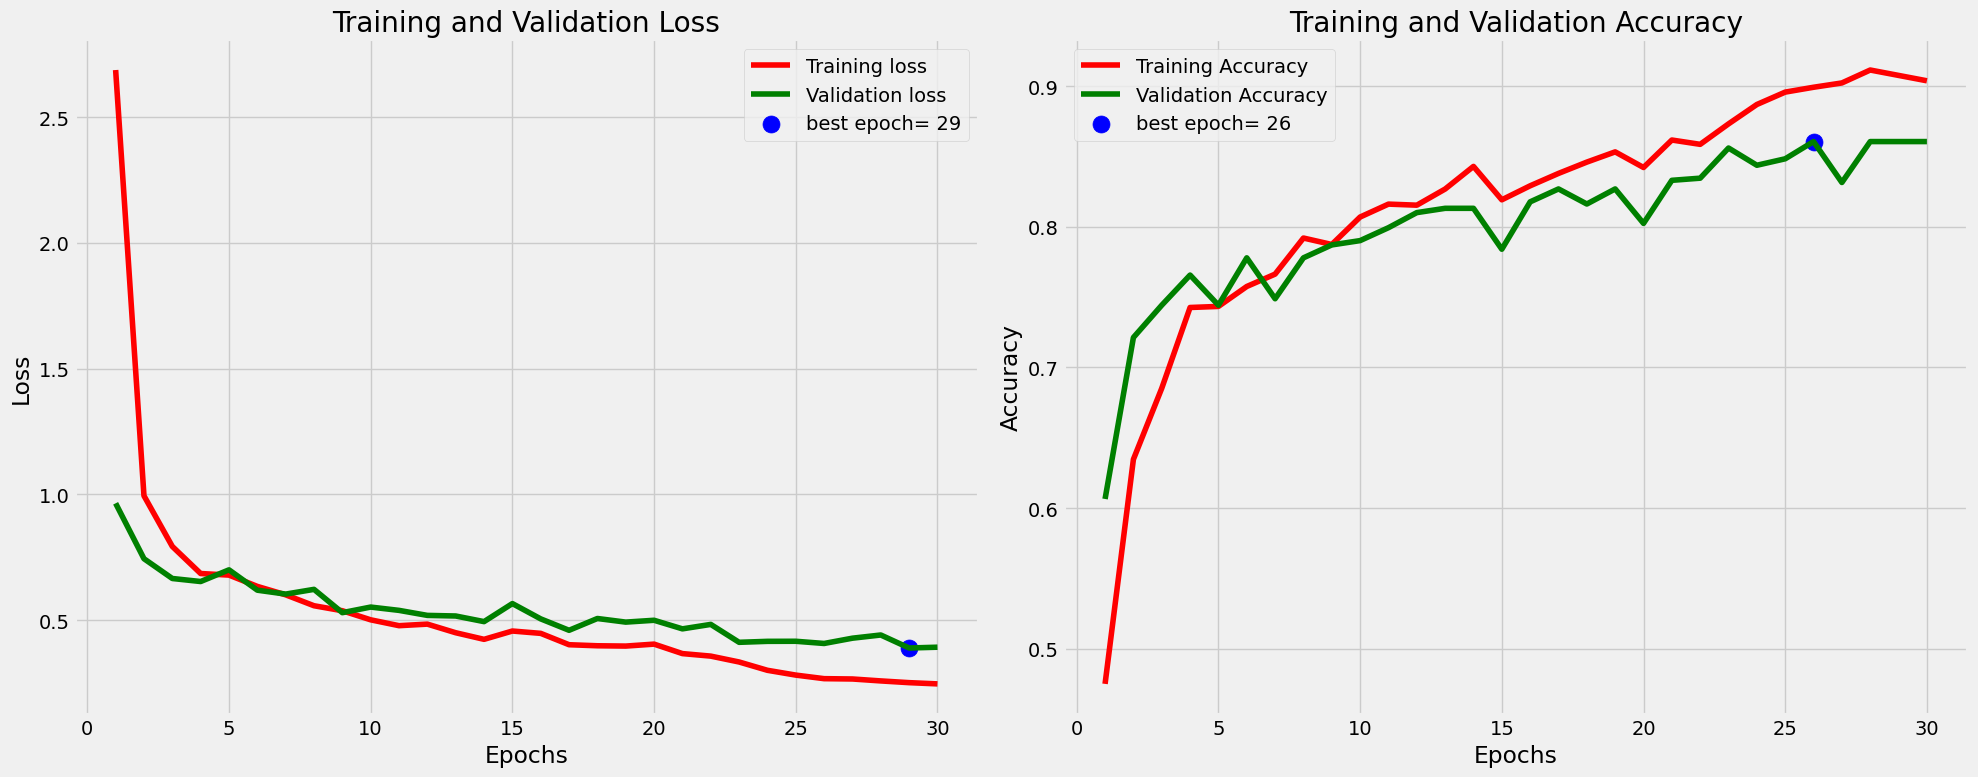

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 352ms/step - accuracy: 0.8681 - loss: 0.3852
Validation loss: 0.3876420855522156, Validation accuracy: 0.860643208026886
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 401ms/step
Classification Report for Fold 1
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       198
           1       0.79      0.84      0.81       193
           2       0.89      0.86      0.87        97
           3       0.88      0.95      0.91       165

    accuracy                           0.86       653
   macro avg       0.87      0.86      0.86       653
weighted avg       0.86      0.86      0.86       653

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step


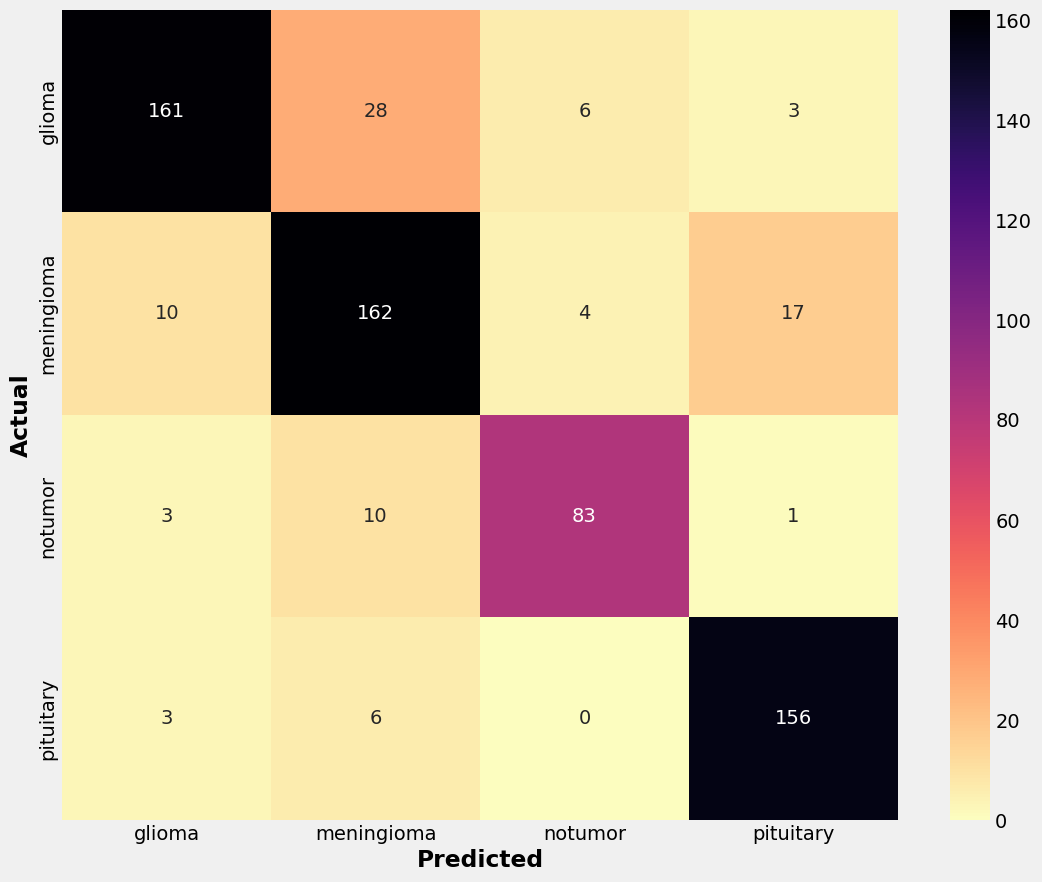

Fold 2/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 988ms/step - accuracy: 0.9093 - loss: 0.2826 - val_accuracy: 0.9433 - val_loss: 0.1937 - learning_rate: 5.0000e-04
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 974ms/step - accuracy: 0.9037 - loss: 0.2922 - val_accuracy: 0.9449 - val_loss: 0.2007 - learning_rate: 5.0000e-04
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 957ms/step - accuracy: 0.9019 - loss: 0.2685 - val_accuracy: 0.9234 - val_loss: 0.2230 - learning_rate: 5.0000e-04
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 984ms/step - accuracy: 0.9070 - loss: 0.2689 - val_accuracy: 0.9433 - val_loss: 0.2075 - learning_rate: 5.0000e-04
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 974ms/step - accuracy: 0.9032 - loss: 0.2595 - val_accuracy: 0.9372 - val_loss: 0.2195 - learning_rate: 5.0000e-04
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 977ms/step - accuracy: 0.9074 - loss: 0.2669 - val_accuracy: 0.9387 - val_loss: 0.2055 - learning_rate: 5.0000e-04
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 976ms/s

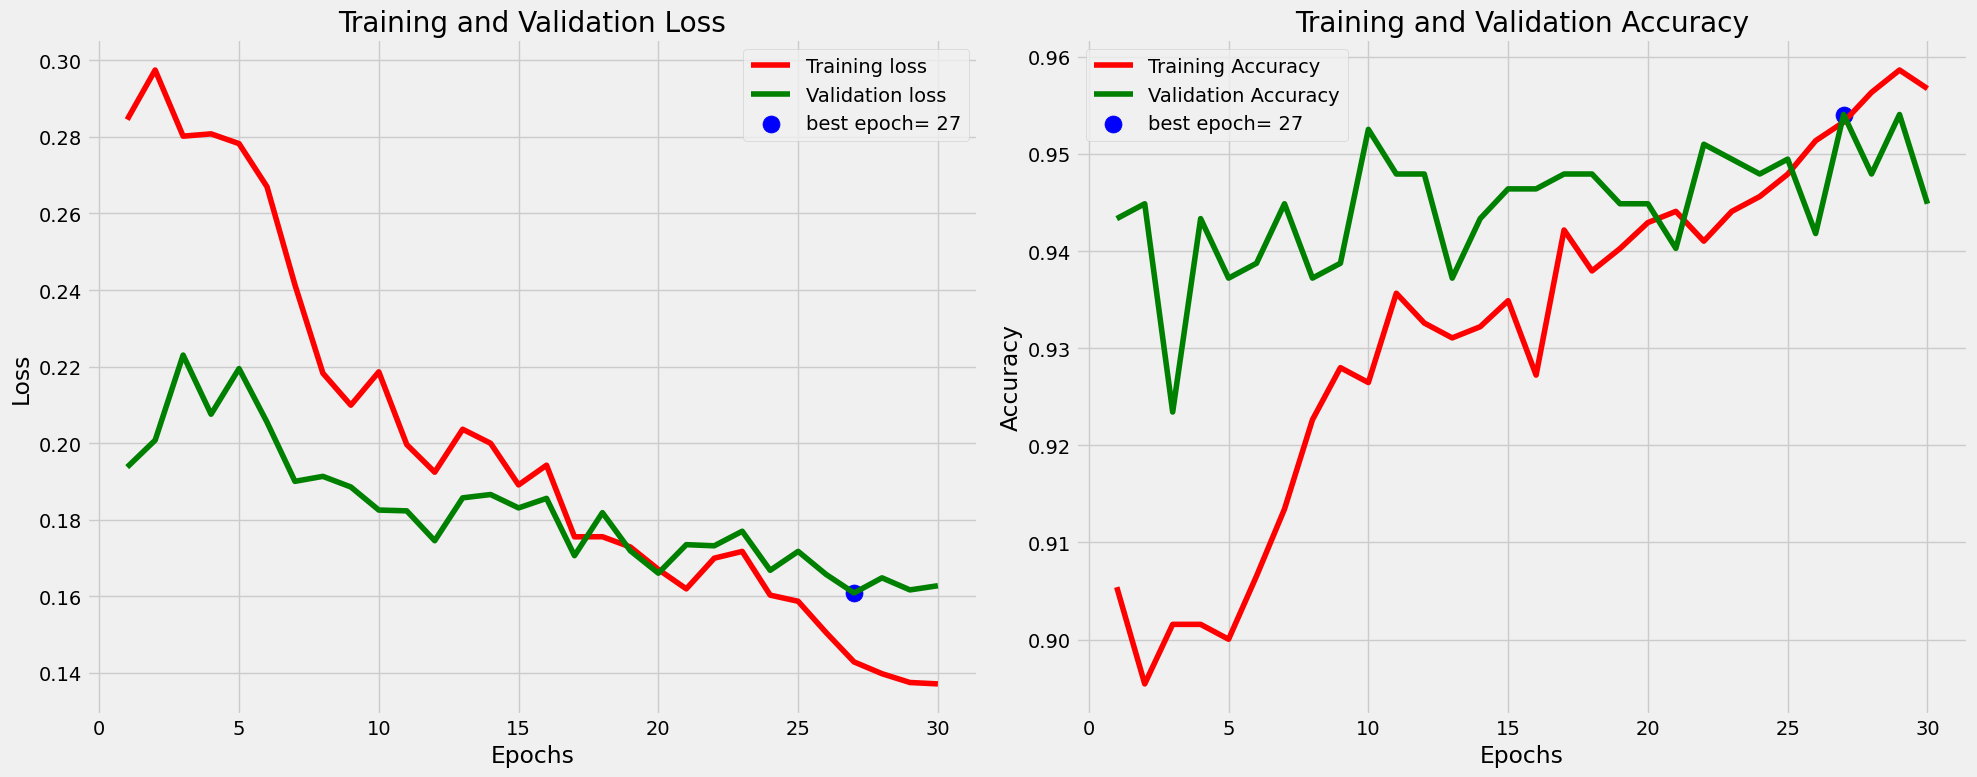

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step - accuracy: 0.9492 - loss: 0.1753
Validation loss: 0.15931914746761322, Validation accuracy: 0.9540581703186035
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step
Classification Report for Fold 2
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       190
           1       0.90      0.98      0.94       198
           2       0.97      1.00      0.99       105
           3       0.98      0.97      0.97       160

    accuracy                           0.95       653
   macro avg       0.96      0.96      0.96       653
weighted avg       0.96      0.95      0.95       653

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step


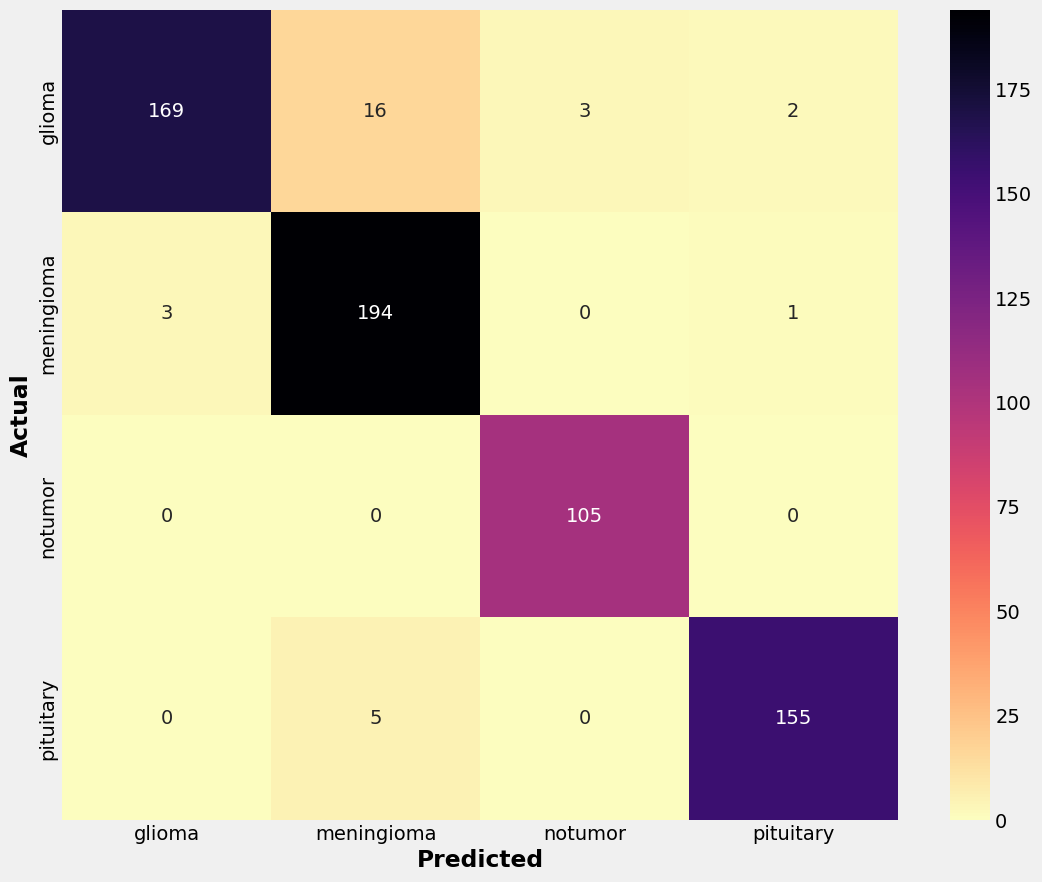

Fold 3/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 924ms/step - accuracy: 0.9399 - loss: 0.1689 - val_accuracy: 0.9923 - val_loss: 0.0731 - learning_rate: 1.2500e-04
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 923ms/step - accuracy: 0.9507 - loss: 0.1530 - val_accuracy: 0.9832 - val_loss: 0.0883 - learning_rate: 1.2500e-04
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 924ms/step - accuracy: 0.9455 - loss: 0.1666 - val_accuracy: 0.9862 - val_loss: 0.0749 - learning_rate: 1.2500e-04
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 924ms/step - accuracy: 0.9466 - loss: 0.1480 - val_accuracy: 0.9832 - val_loss: 0.0762 - learning_rate: 1.2500e-04
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 923ms/step - accuracy: 0.9465 - loss: 0.1489 - val_accuracy: 0.9877 - val_loss: 0.0855 - learning_rate: 1.2500e-04
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 924ms/step - accuracy: 0.9541 - loss: 0.1399 - val_accuracy: 0.9877 - val_loss: 0.0735 - learning_rate: 1.2500e-04
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 924ms/s

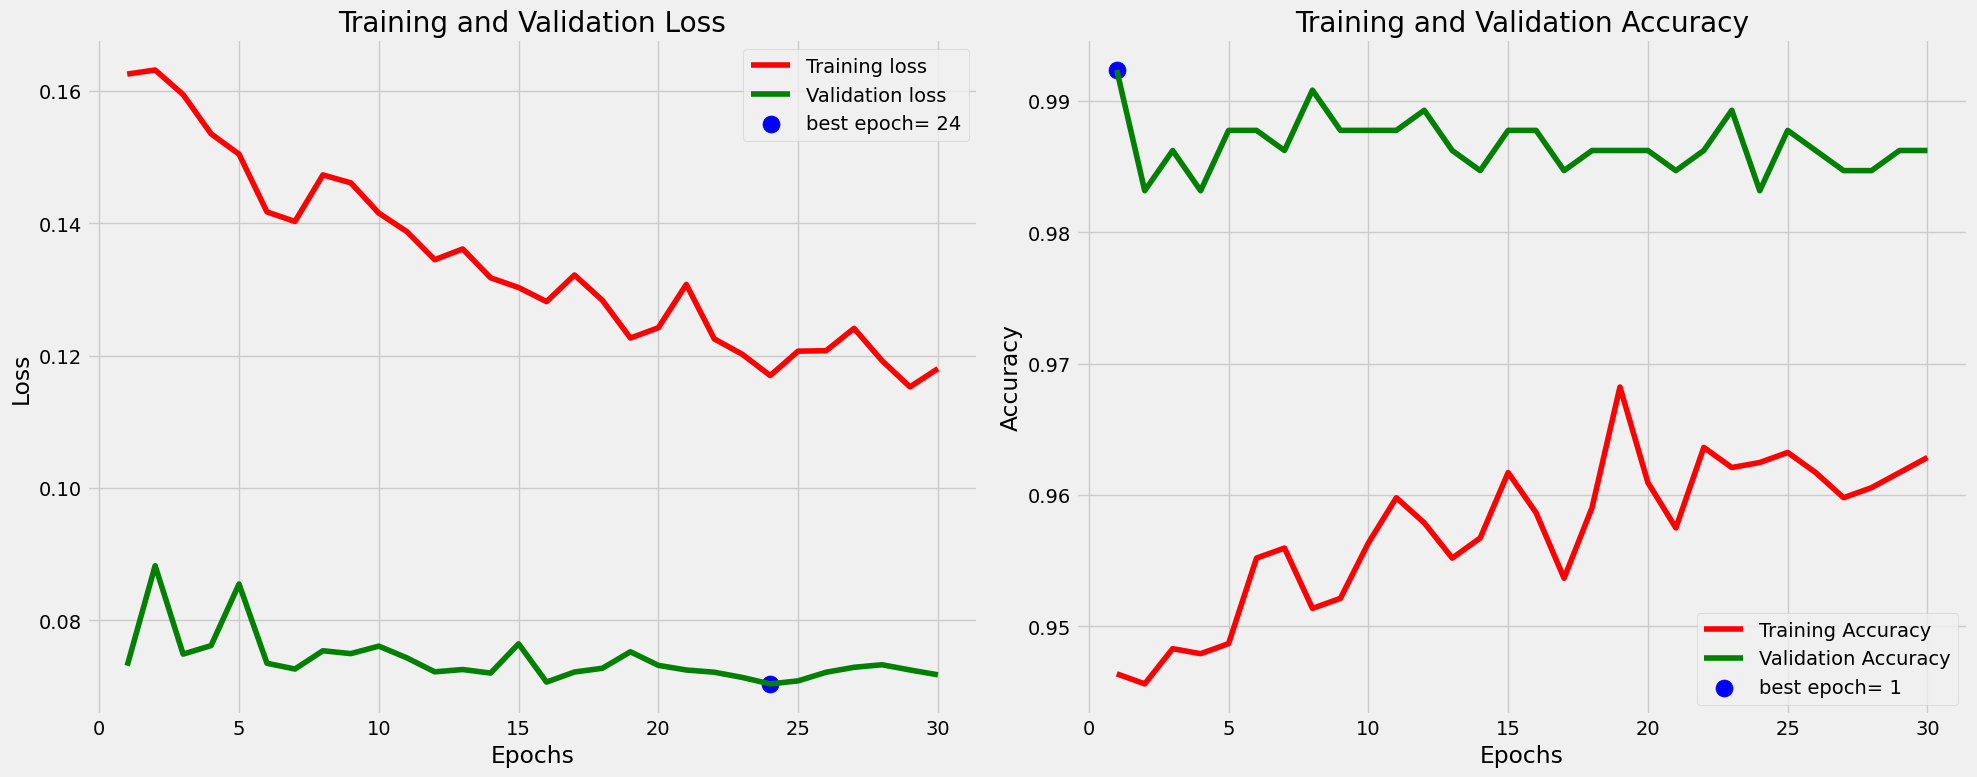

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 337ms/step - accuracy: 0.9890 - loss: 0.0688
Validation loss: 0.07295911014080048, Validation accuracy: 0.9831546545028687
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step
Classification Report for Fold 3
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       174
           1       0.96      0.98      0.97       184
           2       1.00      1.00      1.00       110
           3       0.98      1.00      0.99       185

    accuracy                           0.98       653
   macro avg       0.99      0.98      0.98       653
weighted avg       0.98      0.98      0.98       653

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 337ms/step


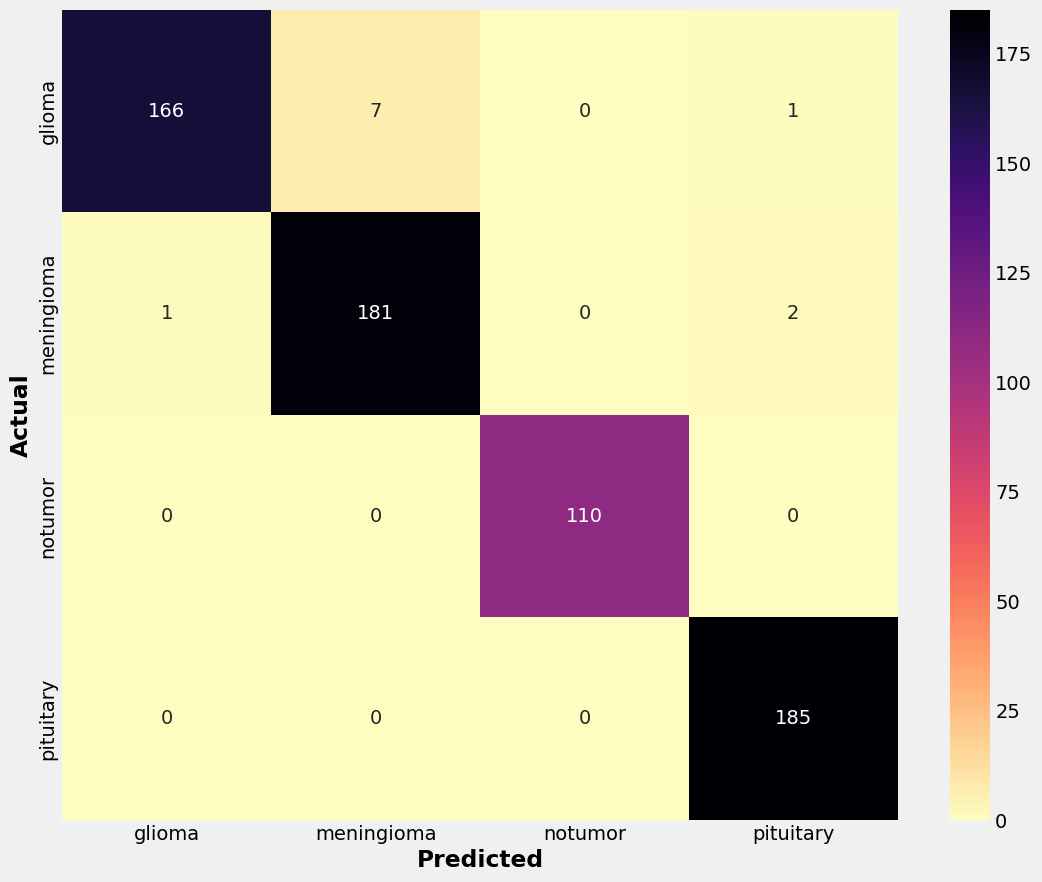

Fold 4/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 929ms/step - accuracy: 0.9604 - loss: 0.1199 - val_accuracy: 0.9877 - val_loss: 0.0661 - learning_rate: 1.5625e-05
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 930ms/step - accuracy: 0.9690 - loss: 0.1143 - val_accuracy: 0.9893 - val_loss: 0.0668 - learning_rate: 1.5625e-05
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 927ms/step - accuracy: 0.9686 - loss: 0.1156 - val_accuracy: 0.9893 - val_loss: 0.0671 - learning_rate: 1.5625e-05
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 925ms/step - accuracy: 0.9624 - loss: 0.1192 - val_accuracy: 0.9877 - val_loss: 0.0669 - learning_rate: 1.5625e-05
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 929ms/step - accuracy: 0.9631 - loss: 0.1248 - val_accuracy: 0.9847 - val_loss: 0.0675 - learning_rate: 1.5625e-05
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 927ms/step - accuracy: 0.9659 - loss: 0.1138 - val_accuracy: 0.9862 - val_loss: 0.0674 - learning_rate: 1.5625e-05
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 927ms/s

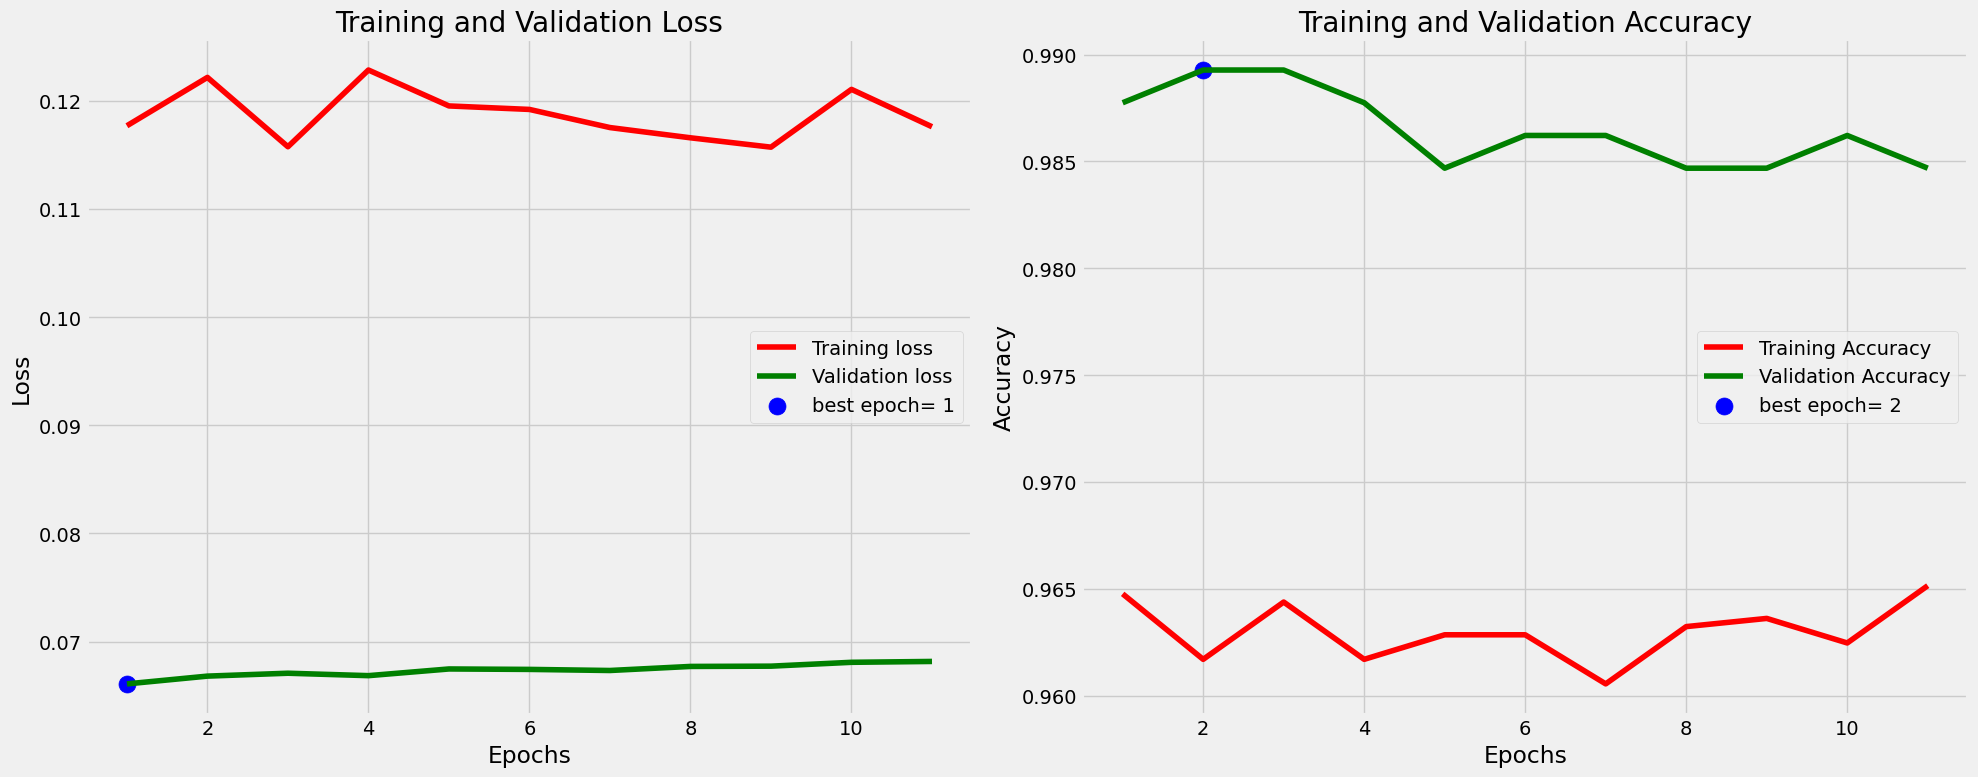

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step - accuracy: 0.9811 - loss: 0.0723
Validation loss: 0.06648054718971252, Validation accuracy: 0.9877488613128662
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step
Classification Report for Fold 4
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       179
           1       0.97      0.98      0.98       191
           2       1.00      1.00      1.00        91
           3       0.99      1.00      1.00       192

    accuracy                           0.99       653
   macro avg       0.99      0.99      0.99       653
weighted avg       0.99      0.99      0.99       653

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step


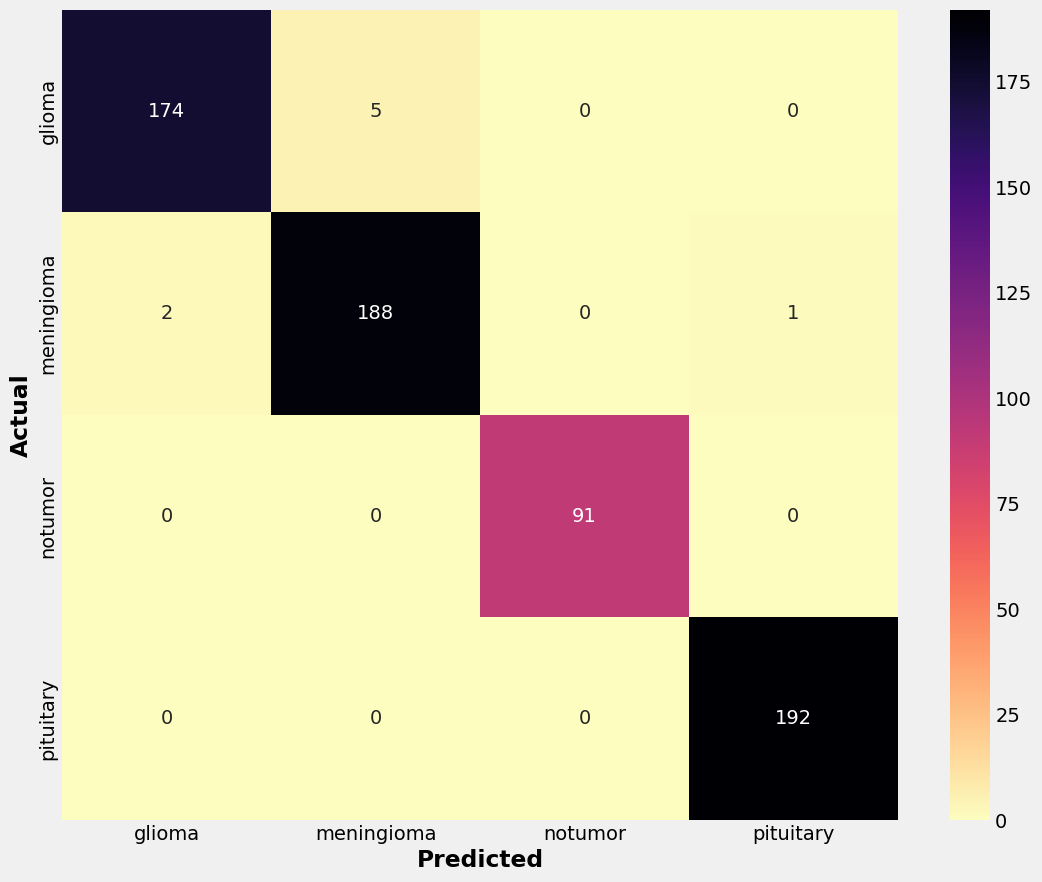

Fold 5/5
Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 926ms/step - accuracy: 0.9704 - loss: 0.1108 - val_accuracy: 0.9831 - val_loss: 0.0750 - learning_rate: 1.0000e-05
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 930ms/step - accuracy: 0.9646 - loss: 0.1188 - val_accuracy: 0.9831 - val_loss: 0.0754 - learning_rate: 1.0000e-05
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 928ms/step - accuracy: 0.9671 - loss: 0.1144 - val_accuracy: 0.9831 - val_loss: 0.0755 - learning_rate: 1.0000e-05
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 928ms/step - accuracy: 0.9603 - loss: 0.1187 - val_accuracy: 0.9831 - val_loss: 0.0755 - learning_rate: 1.0000e-05
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 927ms/step - accuracy: 0.9757 - loss: 0.1072 - val_accuracy: 0.9831 - val_loss: 0.0754 - learning_rate: 1.0000e-05
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 928ms/step - accuracy: 0.9662 - loss: 0.1230 - val_accuracy: 0.9831 - val_loss: 0.0754 - learning_rate: 1.0000e-05
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 926ms/s

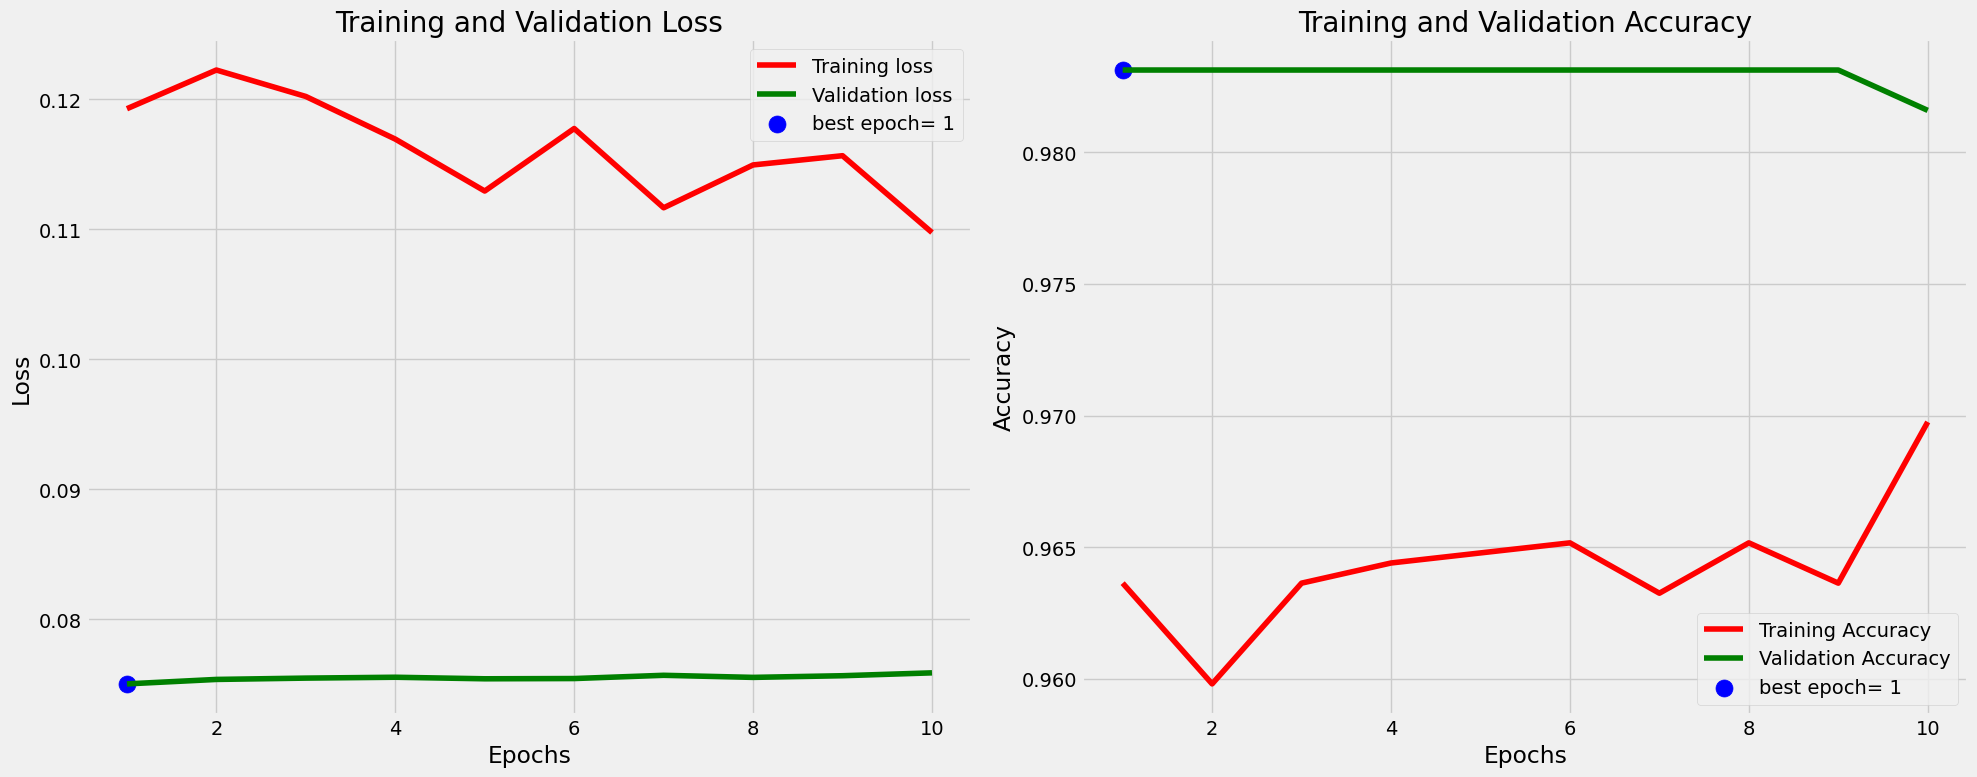

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step - accuracy: 0.9750 - loss: 0.0875
Validation loss: 0.07613180577754974, Validation accuracy: 0.9831288456916809
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step
Classification Report for Fold 5
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       185
           1       0.96      0.98      0.97       171
           2       1.00      1.00      1.00        97
           3       0.99      1.00      1.00       199

    accuracy                           0.98       652
   macro avg       0.98      0.98      0.98       652
weighted avg       0.98      0.98      0.98       652

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step


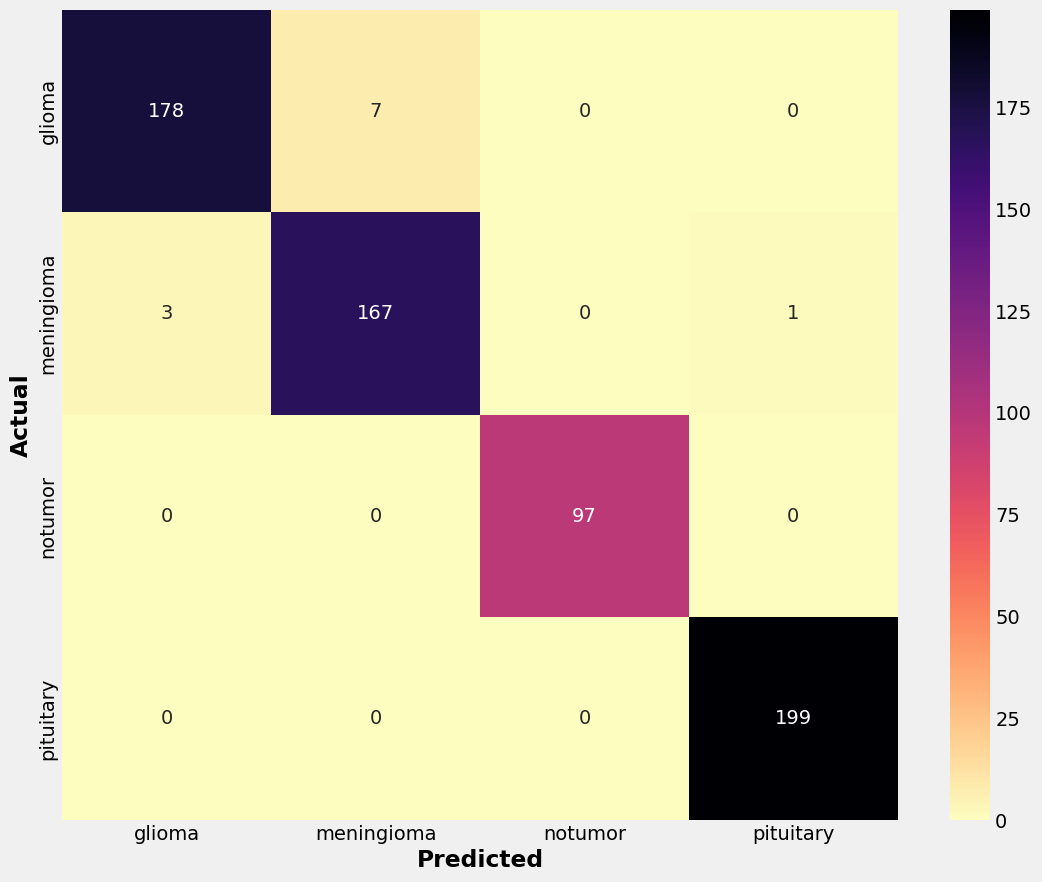

Total runtime of model: 73.22936763763428 Seconds


In [53]:
starting_time = time.time()   

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds) 

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train_1)):
    print(f"Fold {fold + 1}/{num_folds}")
    X_train_fold, X_val_fold = X_train_1[train_index], X_train_1[val_index]
    y_train_fold, y_val_fold = y_train_one_encoded_1[train_index], y_train_one_encoded_1[val_index]

    # Train the model on this fold
    history_DenseNet121 = model_DenseNet121.fit(X_train_fold, y_train_fold, epochs=30, batch_size=64, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping, reduce_lr] )

    visualize_2(history_DenseNet121)
    # Evaluate the model on the validation fold
    scores = model_DenseNet121.evaluate(X_val_fold, y_val_fold)
    print(f"Validation loss: {scores[0]}, Validation accuracy: {scores[1]}") 
    
    
    # Generate predictions for the validation fold
    fold_predictions_3 = np.argmax(model_DenseNet121.predict(X_val_fold), axis=-1)
    fold_true_labels_3 = np.argmax(y_val_fold, axis=-1)
    
    # Generate and print classification report for this fold
    fold_classification_report = classification_report(fold_true_labels_3, fold_predictions_3)
    print("Classification Report for Fold", fold + 1)
    print(fold_classification_report)

    y_pred = model_DenseNet121.predict(X_val_fold)  # X_test_normalized
    y_pred = np.argmax(y_pred,axis=1)  
    y_test_new = np.argmax(y_val_fold,axis=1) 

    conf_matrix = confusion_matrix(y_test_new,y_pred) # x=y_test_new, y=y_pred

    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted', fontweight='bold')
    plt.ylabel('Actual', fontweight='bold')
    plt.show() 


ending_time = time.time()    

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Seconds") 

In [54]:
val_loss, val_acc = model_DenseNet121.evaluate(X_val_fold, y_val_fold)
print("Test Accuracy: {:.2f}%".format(val_acc * 100)) 
print("Test Loss: {:.2f}%".format(val_loss * 100))

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step - accuracy: 0.9750 - loss: 0.0875
Test Accuracy: 98.31%
Test Loss: 7.61%


In [55]:
y_pred = model_DenseNet121.predict(X_val_fold)
y_pred = np.argmax(y_pred,axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 332ms/step


In [56]:
y_test_new = np.argmax(y_val_fold,axis=1)

In [57]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       185
           1       0.96      0.98      0.97       171
           2       1.00      1.00      1.00        97
           3       0.99      1.00      1.00       199

    accuracy                           0.98       652
   macro avg       0.98      0.98      0.98       652
weighted avg       0.98      0.98      0.98       652



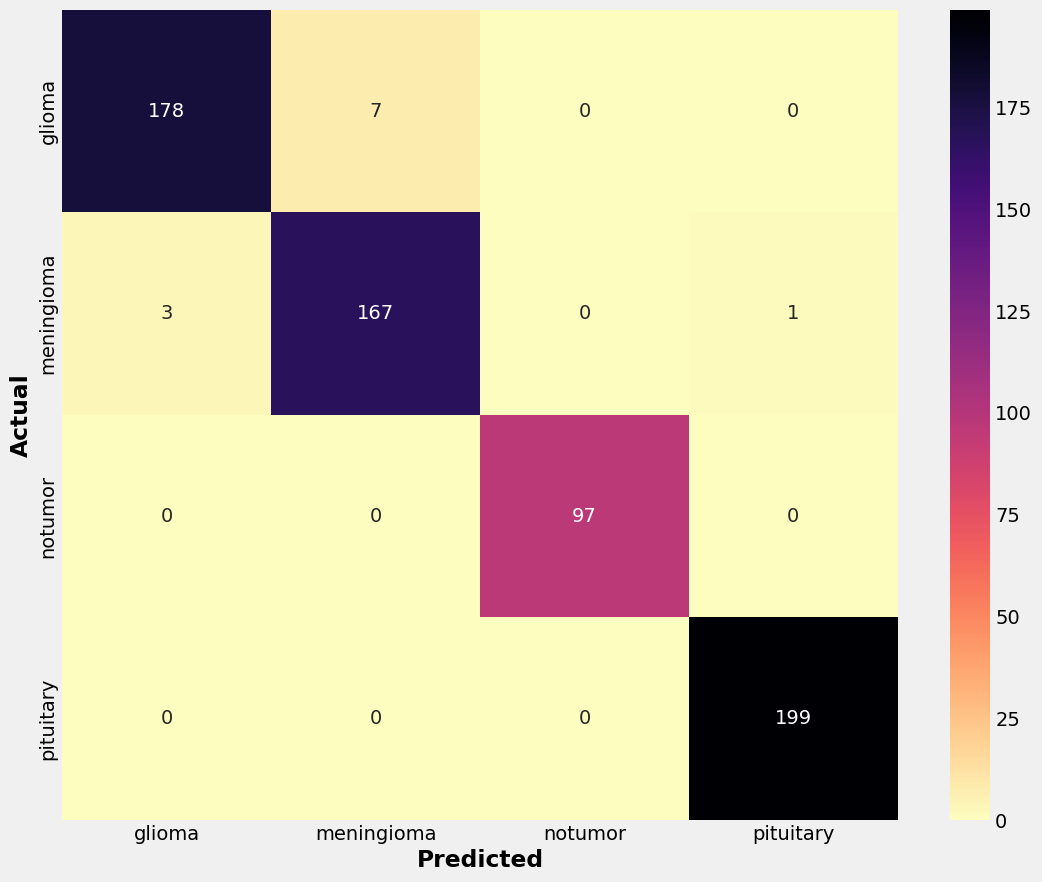

In [58]:
conf_matrix = confusion_matrix(y_test_new,y_pred) # x=y_test_new, y=y_pred

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.show() 

In [59]:
# saving the model 
save_model(model_DenseNet121, 'saved_model_DenseNet121_lastone1.keras')  

In [60]:
# Loading model 
model_modelDenseNet121 = load_model('saved_model_DenseNet121_lastone1.keras')

c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 734 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [61]:
second_last_layer_output = model_modelDenseNet121.layers[-2].output

feature_extractor_3 = Model(inputs=model_modelDenseNet121.input, outputs=second_last_layer_output)  

# feature_extractor_3.summary()

In [62]:
extracted_feature_DenseNet121_Training = feature_extractor_3.predict(X_train_fold)

82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 353ms/step


In [63]:
extracted_feature_DenseNet121_Training.shape

(2612, 1024)

In [64]:
extracted_feature_DenseNet121_Testing = feature_extractor_3.predict(X_val_fold)

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 342ms/step


In [65]:
extracted_feature_DenseNet121_Testing.shape

(652, 1024)

## Feature Extraction

In [66]:
## X_train
print(extracted_feature_Xception_Training.shape) 
print(extracted_feature_InceptionV3_Training.shape) 
print(extracted_feature_DenseNet121_Training.shape) 
print('///////////////////////////////////')
#X_test 
print(extracted_feature_Xception_Testing.shape) 
print(extracted_feature_InceptionV3_Testing.shape) 
print(extracted_feature_DenseNet121_Testing.shape) 

(2612, 1024)
(2612, 1024)
(2612, 1024)
///////////////////////////////////
(652, 1024)
(652, 1024)
(652, 1024)


In [67]:
concatenated_features_Training = np.concatenate((extracted_feature_Xception_Training, 
                                        extracted_feature_InceptionV3_Training, 
                                        extracted_feature_DenseNet121_Training), axis=1)

# Check the shape of the concatenated features 
concatenated_features_Testing = np.concatenate((extracted_feature_Xception_Testing, 
                                        extracted_feature_InceptionV3_Testing, 
                                        extracted_feature_DenseNet121_Testing), axis=1)

print("Features Shape for training:", concatenated_features_Training.shape) 
print("Features Shape for testing:", concatenated_features_Testing.shape) 

Features Shape for training: (2612, 3072)
Features Shape for testing: (652, 3072)


In [68]:
#Libraries 
#ML classifiers
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.multioutput import MultiOutputClassifier 
from sklearn.metrics import accuracy_score 

In [69]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_train_1,y_train_1, test_size=0.2,random_state=101) 

In [70]:
print("Shape of concatenated_features_Training:", concatenated_features_Training.shape)
print("Shape of y_train_fold:", y_train_fold.shape)
print("Shape of concatenated_features_Testing:", concatenated_features_Testing.shape)
print("Shape of y_val_fold:", y_val_fold.shape)

Shape of concatenated_features_Training: (2612, 3072)
Shape of y_train_fold: (2612, 4)
Shape of concatenated_features_Testing: (652, 3072)
Shape of y_val_fold: (652, 4)


## RF --------------------------------------------------------------

In [92]:
starting_time = time.time()   

random_forest_classifier = RandomForestClassifier(n_estimators=1000, max_depth=1000)  
random_forest_classifier.fit(concatenated_features_Training, y_train_fold)

# Evaluate Random Forest classifier
accuracy_RF = random_forest_classifier.score(concatenated_features_Testing, y_val_fold)
print("Accuracy of RF:", accuracy_RF)   

ending_time = time.time()   

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of RF: 0.9478527607361963
Total runtime of model: 0.3399948239326477 Min.


In [93]:
# Predict the labels for the test set
y_pred_RF = random_forest_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_val_fold, y_pred_RF, target_names=labels)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       185
           1       0.96      0.96      0.96       171
           2       1.00      0.97      0.98        97
           3       1.00      1.00      1.00       199

   micro avg       0.99      0.95      0.97       652
   macro avg       0.99      0.95      0.97       652
weighted avg       0.99      0.95      0.97       652
 samples avg       0.95      0.95      0.95       652



c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


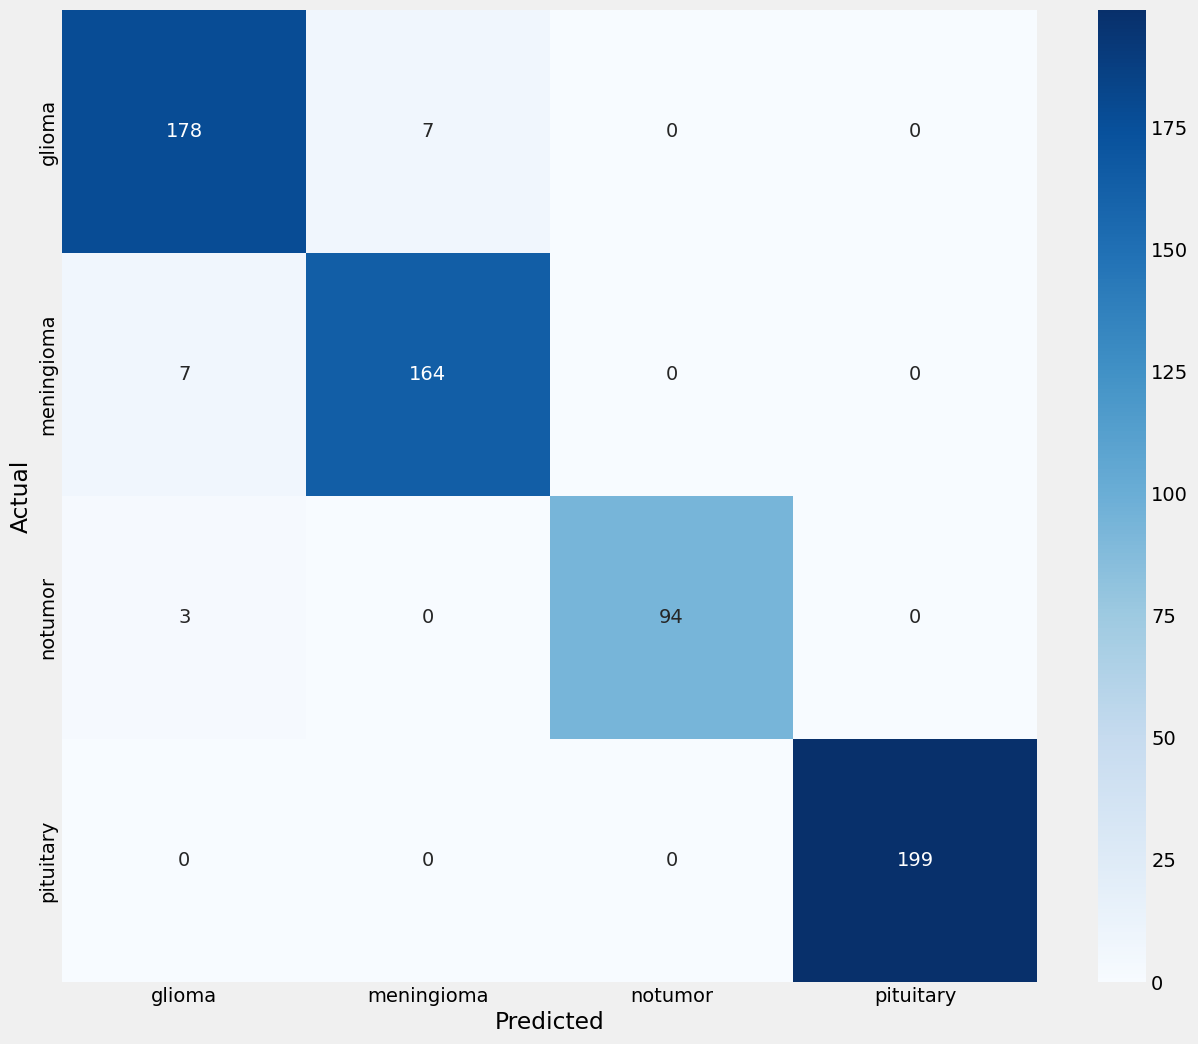

In [94]:
# Convert one-hot encoded labels to single-label indicators
y_val_single = np.argmax(y_val_fold, axis=1)
y_pred_single = np.argmax(y_pred_RF, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val_single, y_pred_single)

plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## LR ---------------------------------------------------------------------

In [74]:
starting_time = time.time()    

# Train a multi-output logistic regression classifier
logistic_regression_classifier = LogisticRegression(multi_class="multinomial", max_iter=10000)
multi_output_classifier = MultiOutputClassifier(logistic_regression_classifier)
multi_output_classifier.fit(concatenated_features_Training, y_train_fold)

# Predict on the testing data
y_pred_LR = multi_output_classifier.predict(concatenated_features_Testing) 

# Calculate accuracy
accuracy_lr = accuracy_score(y_val_fold, y_pred_LR)
print("Accuracy of LR:", accuracy_lr) 

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.")

Accuracy of LR: 0.9861963190184049
Total runtime of model: 0.03679776589075724 Min.


In [75]:
# Generate classification report
report = classification_report(y_val_fold, y_pred_LR, target_names=labels)
print(report)

              precision    recall  f1-score   support

      glioma       1.00      0.98      0.99       185
  meningioma       0.98      0.99      0.99       171
     notumor       1.00      0.99      0.99        97
   pituitary       1.00      1.00      1.00       199

   micro avg       0.99      0.99      0.99       652
   macro avg       0.99      0.99      0.99       652
weighted avg       0.99      0.99      0.99       652
 samples avg       0.99      0.99      0.99       652



c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


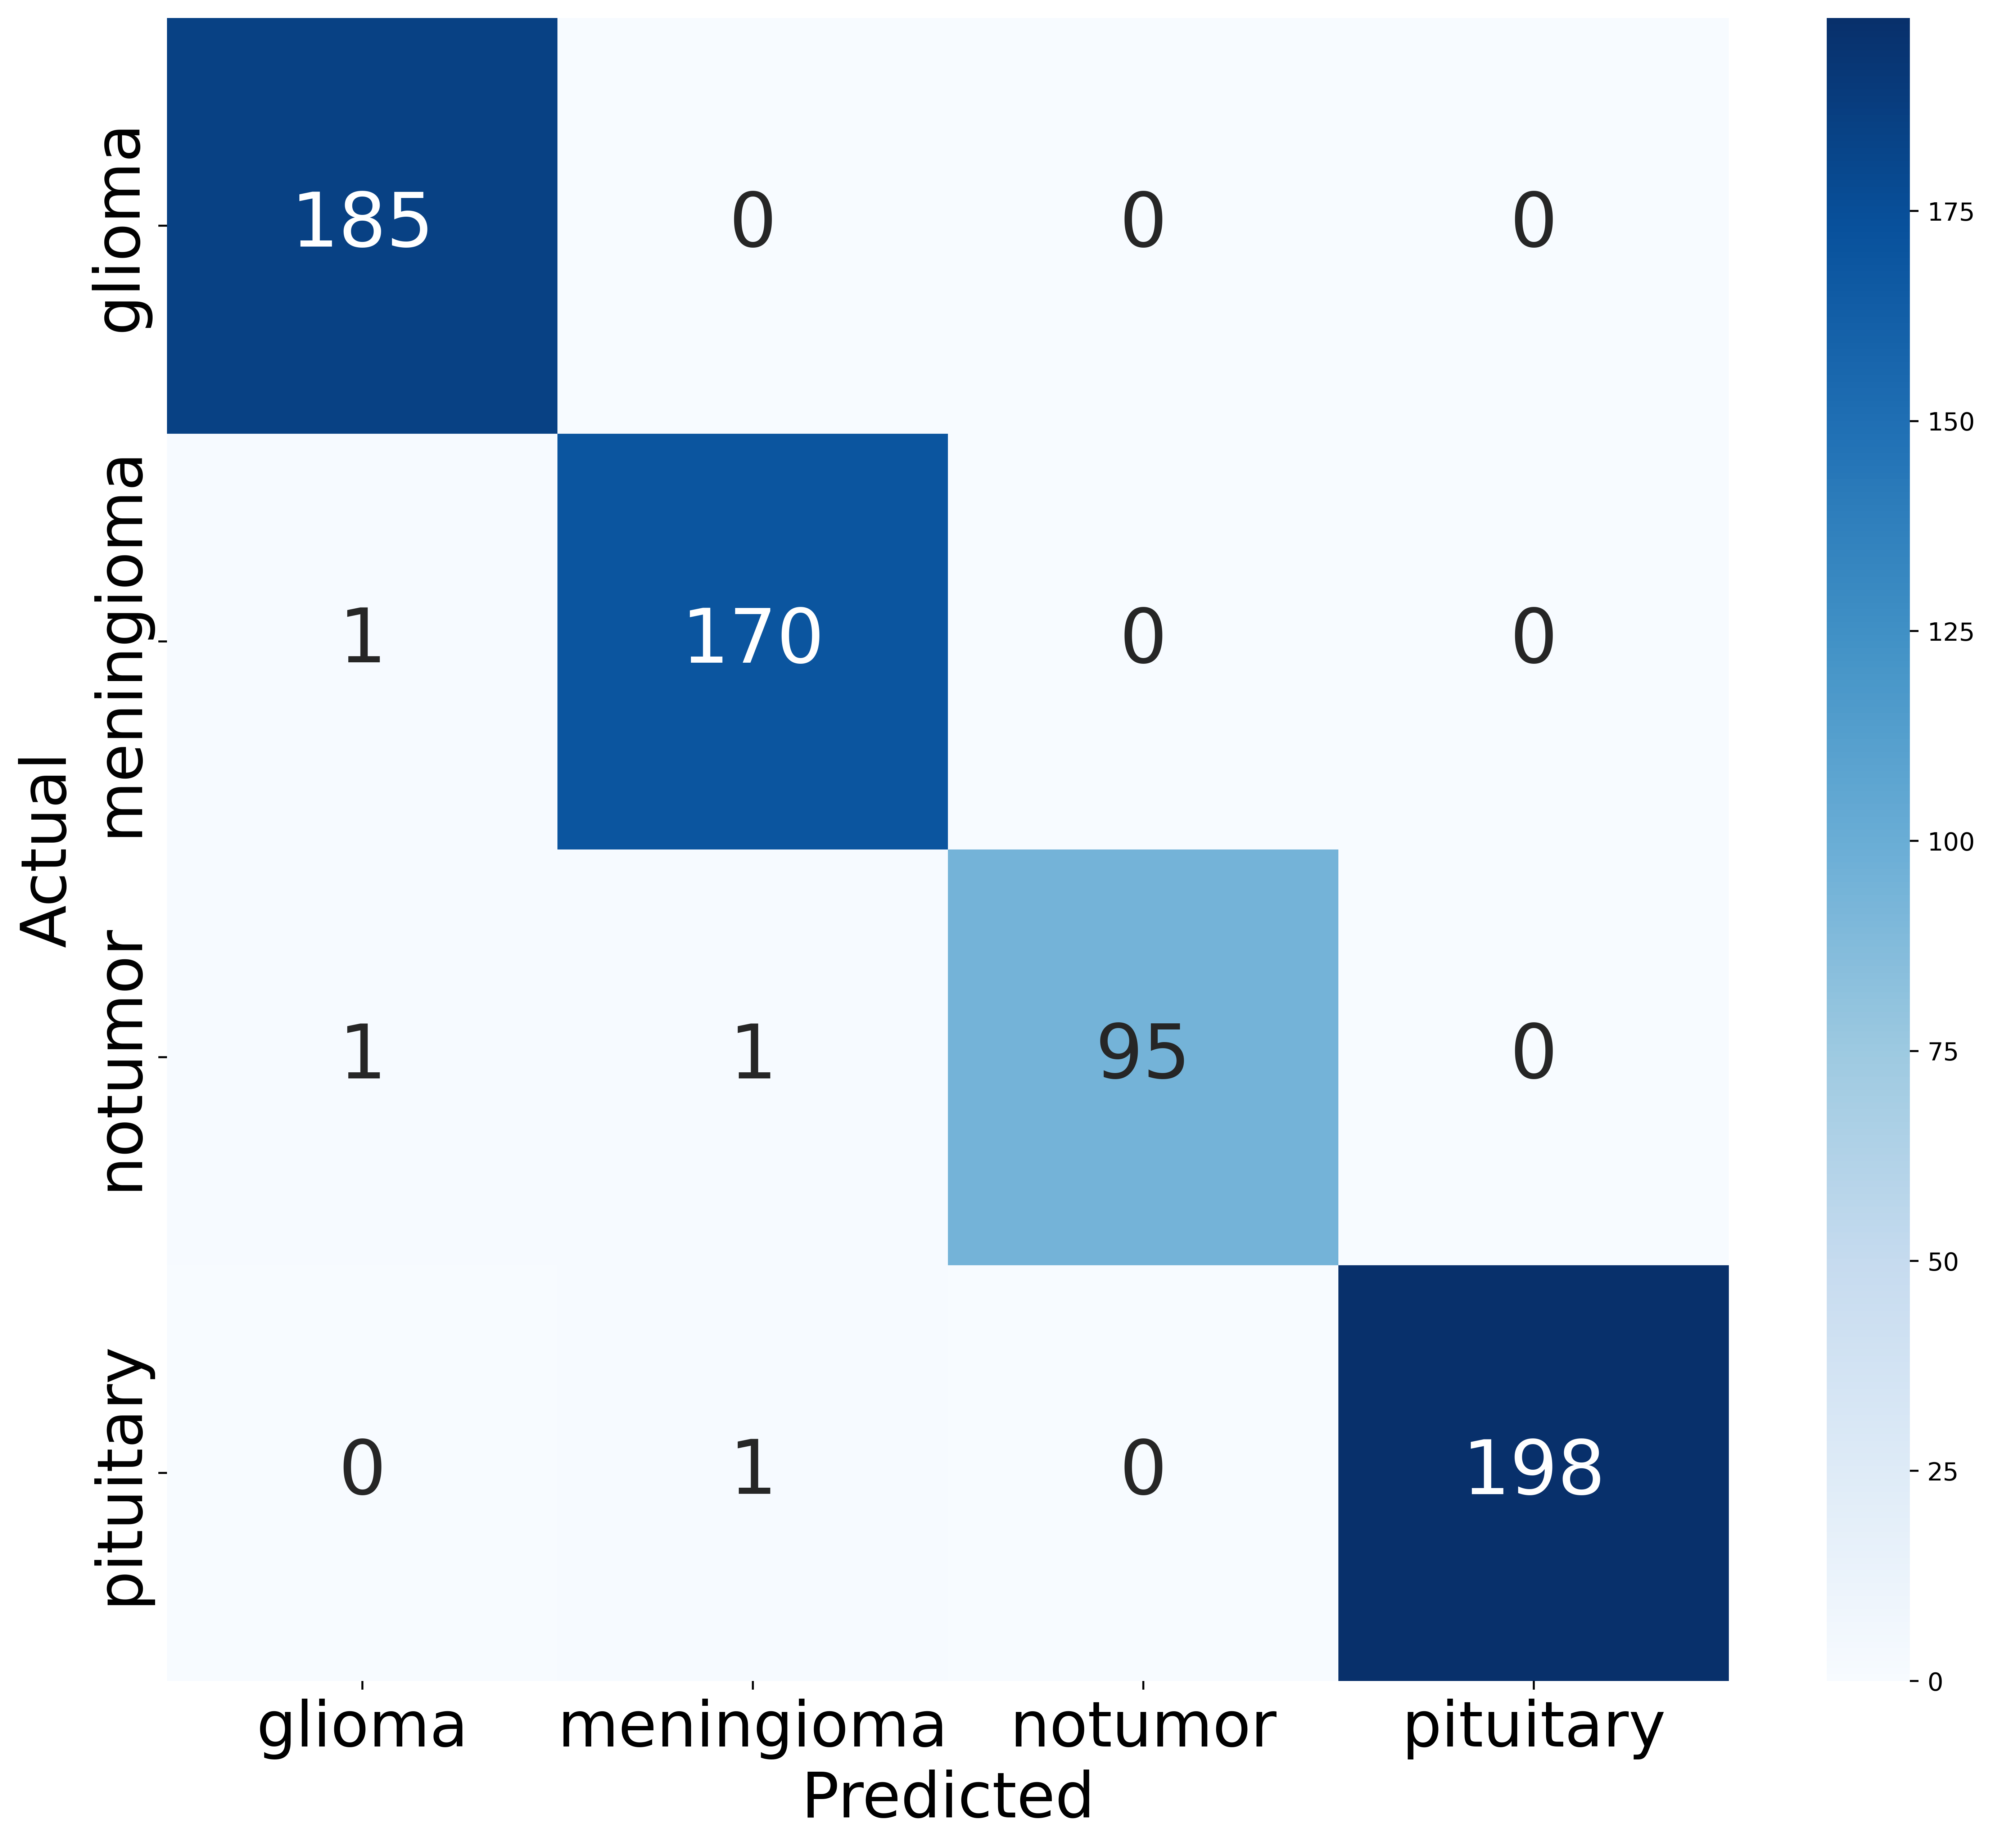

In [1]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[185 , 0, 0,  0],
                              [ 1, 170, 0, 0],
                              [ 1, 1, 95, 0],
                              [  0, 1, 0, 198]])

# Plot confusion matrix
plt.figure(figsize=(14, 12), dpi=500)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 30})

# Increase label font size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25) 
plt.xlabel('Predicted', fontsize = 25)
plt.ylabel('Actual', fontsize = 25)
plt.show()

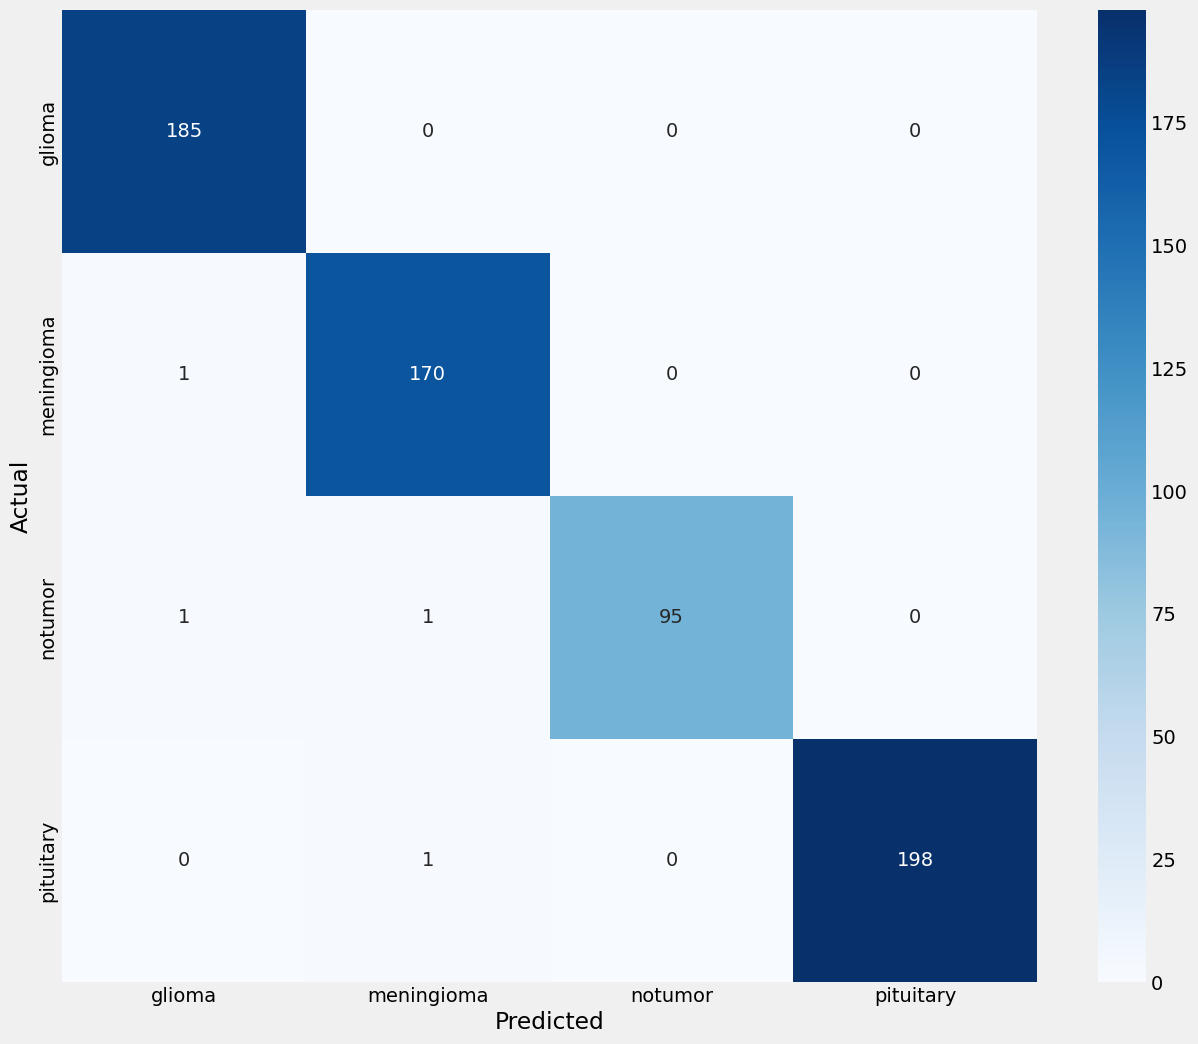

In [76]:
# Convert one-hot encoded labels to single-label indicators
y_val_single = np.argmax(y_val_fold, axis=1)
y_pred_single = np.argmax(y_pred_LR, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val_single, y_pred_single)

plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN -------------------------------------------------------------

In [77]:
starting_time = time.time()   

knn_classifier = KNeighborsClassifier(n_neighbors=4)  
knn_classifier.fit(concatenated_features_Training, y_train_fold)

# Evaluate KNN classifier
accuracy_KNN = knn_classifier.score(concatenated_features_Testing, y_val_fold)
print("Accuracy of KNN:", accuracy_KNN) 

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.")

Accuracy of KNN: 0.8619631901840491
Total runtime of model: 0.004892245928446452 Min.


In [78]:
# Predict the labels for the test set
y_pred_KNN = knn_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_val_fold, y_pred_KNN, target_names=labels)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       185
           1       0.91      0.80      0.85       171
           2       0.97      0.73      0.84        97
           3       0.98      0.99      0.99       199

   micro avg       0.96      0.86      0.91       652
   macro avg       0.96      0.84      0.89       652
weighted avg       0.95      0.86      0.90       652
 samples avg       0.86      0.86      0.86       652



c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


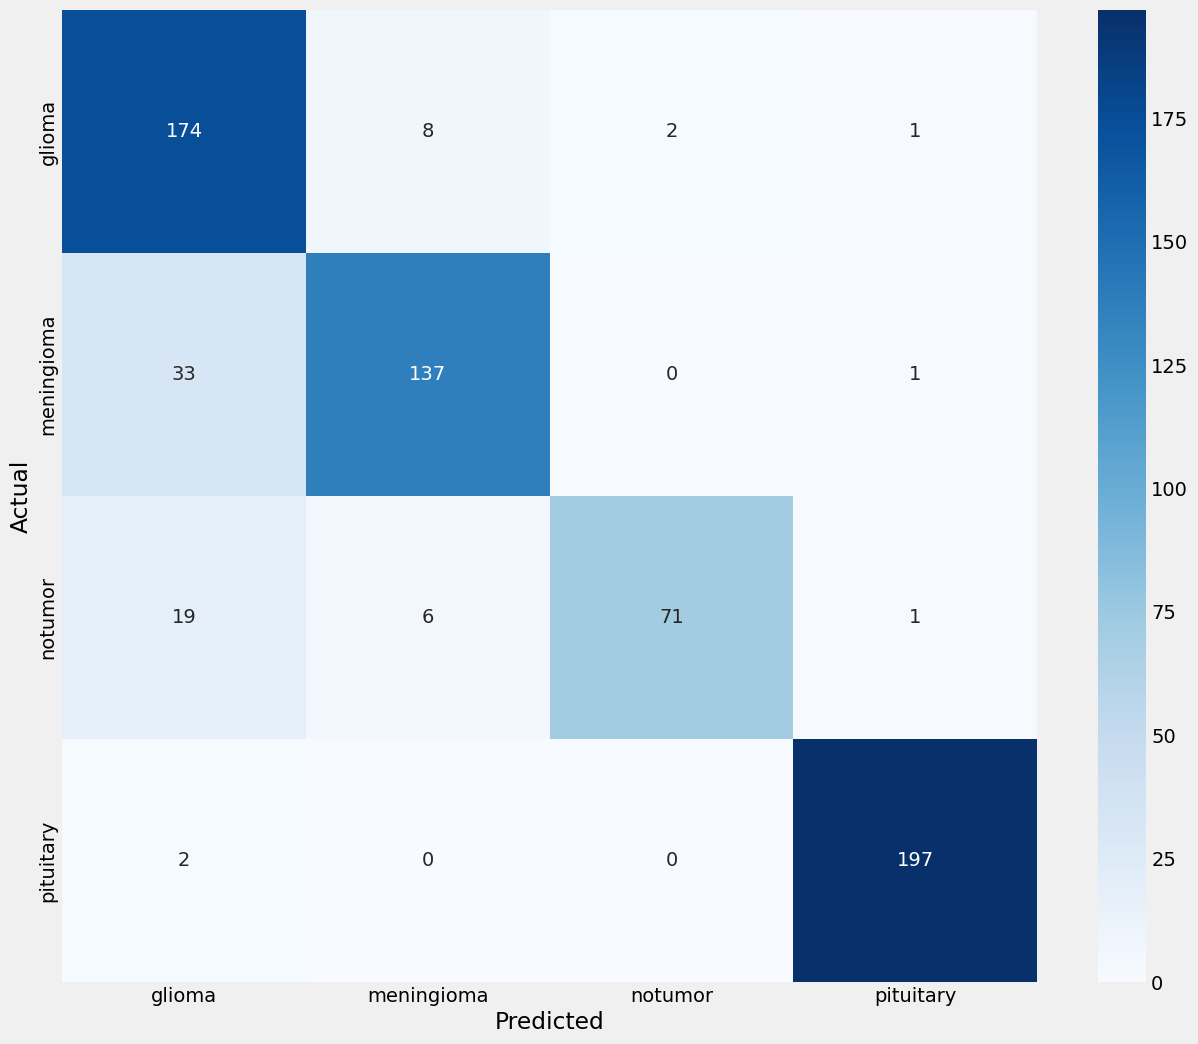

In [79]:
# Convert one-hot encoded labels to single-label indicators
y_val_single = np.argmax(y_val_fold, axis=1)
y_pred_single = np.argmax(y_pred_KNN, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val_single, y_pred_single)

plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM -------------------------------------------------------------

In [80]:
# Before feature selection
starting_time = time.time()    

# Train a multi-output SVM classifier with linear kernel
svm_classifier = SVC(kernel='linear')
multi_output_classifier = MultiOutputClassifier(svm_classifier)
multi_output_classifier.fit(concatenated_features_Training, y_train_fold)

# Predict on the testing data
y_pred_SVM_L = multi_output_classifier.predict(concatenated_features_Testing) 

# Calculate accuracy
accuracy_svm = accuracy_score(y_val_fold, y_pred_SVM_L)
print("Accuracy of SVM:", accuracy_svm) 

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.")


Accuracy of SVM: 0.9831288343558282
Total runtime of model: 0.05288186073303223 Min.


In [81]:
# Generate classification report
report = classification_report(y_val_fold, y_pred_SVM_L, target_names=labels)
print(report)

              precision    recall  f1-score   support

      glioma       0.99      0.98      0.98       185
  meningioma       0.98      1.00      0.99       171
     notumor       1.00      1.00      1.00        97
   pituitary       0.99      1.00      1.00       199

   micro avg       0.99      0.99      0.99       652
   macro avg       0.99      0.99      0.99       652
weighted avg       0.99      0.99      0.99       652
 samples avg       0.99      0.99      0.99       652



c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


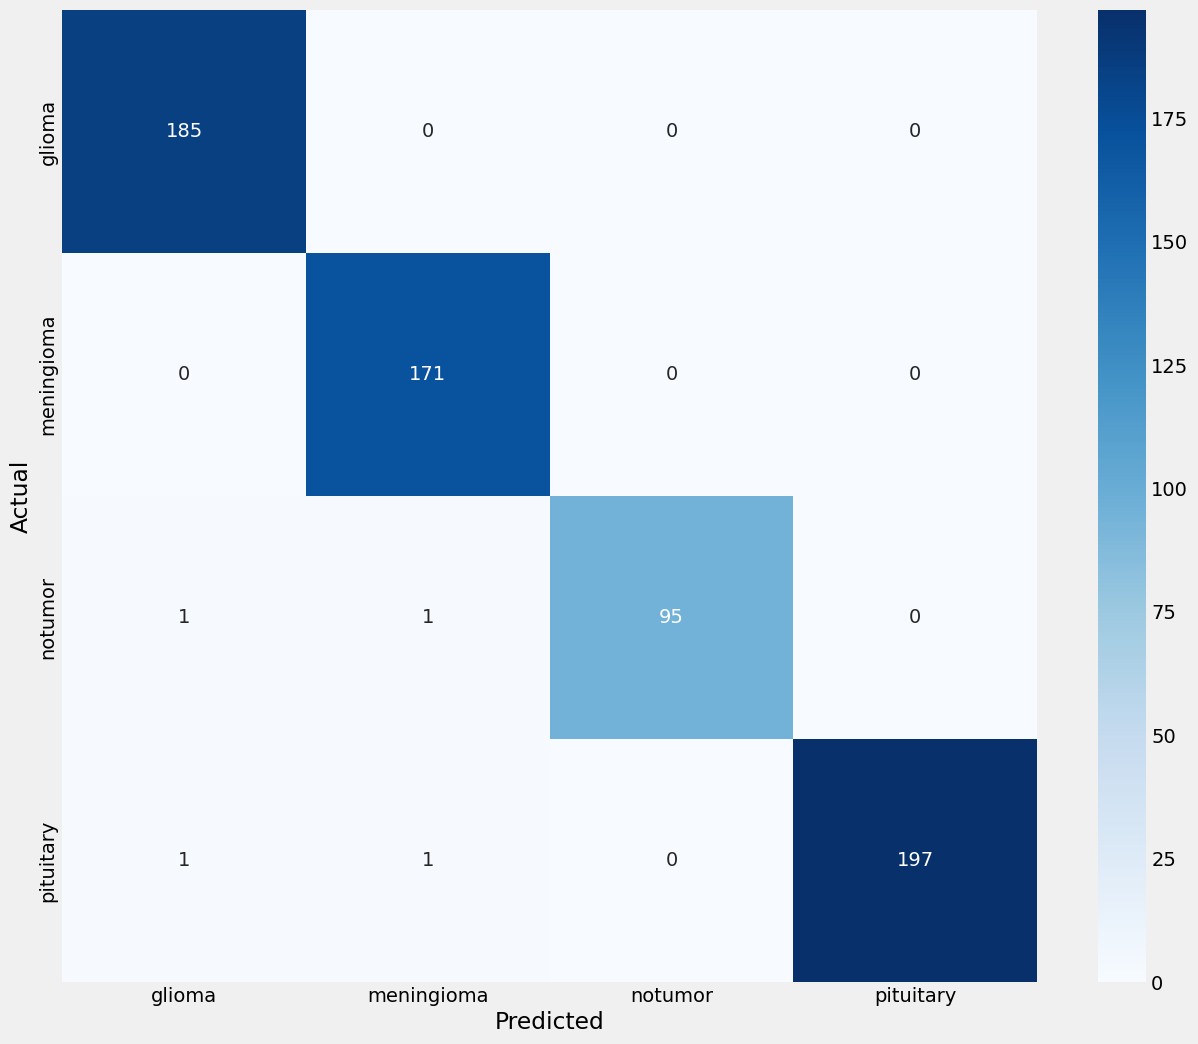

In [82]:
# Convert one-hot encoded labels to single-label indicators
y_val_single = np.argmax(y_val_fold, axis=1)
y_pred_single = np.argmax(y_pred_SVM_L, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val_single, y_pred_single) 

plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM -------------------------------------------------------------

In [83]:
starting_time = time.time()    

# Train a multi-output SVM classifier with linear kernel
svm_classifier = SVC(kernel='rbf')
multi_output_classifier = MultiOutputClassifier(svm_classifier)
multi_output_classifier.fit(concatenated_features_Training, y_train_fold)

# Predict on the testing data
y_pred_SVM_R = multi_output_classifier.predict(concatenated_features_Testing) 

# Calculate accuracy
accuracy_svm = accuracy_score(y_val_fold, y_pred_SVM_R)
print("Accuracy of SVM:", accuracy_svm) 

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.")

Accuracy of SVM: 0.946319018404908
Total runtime of model: 0.17346892754236856 Min.


In [84]:
# Generate classification report
report = classification_report(y_val_fold, y_pred_SVM_R, target_names=labels)
print(report)

              precision    recall  f1-score   support

      glioma       1.00      0.91      0.95       185
  meningioma       0.93      0.96      0.94       171
     notumor       0.99      0.99      0.99        97
   pituitary       0.99      0.99      0.99       199

   micro avg       0.98      0.96      0.97       652
   macro avg       0.98      0.96      0.97       652
weighted avg       0.98      0.96      0.97       652
 samples avg       0.95      0.96      0.95       652



c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


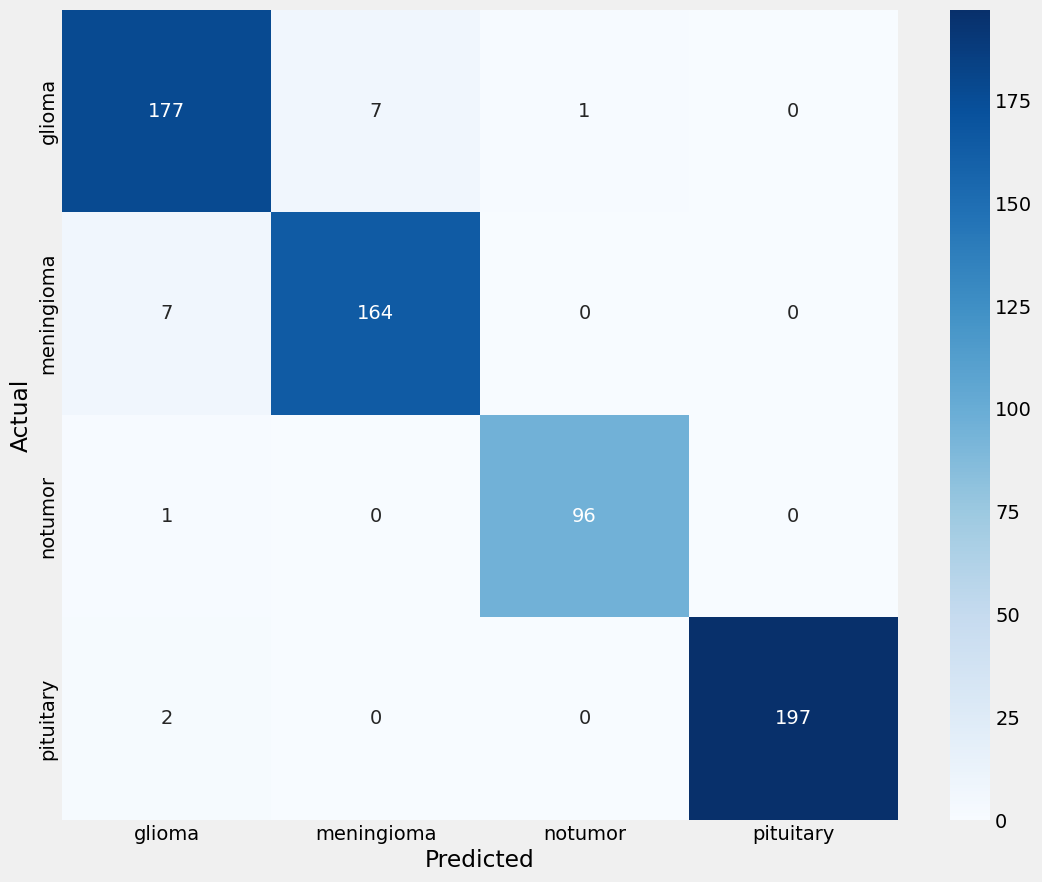

In [85]:

# Convert one-hot encoded labels to single-label indicators
y_val_single = np.argmax(y_val_fold, axis=1)
y_pred_single = np.argmax(y_pred_SVM_R, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val_single, y_pred_single)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM --------------------------------------------------------------------------

In [86]:
starting_time = time.time()    

# Train a multi-output SVM classifier with linear kernel
svm_classifier = SVC(kernel='sigmoid')
multi_output_classifier = MultiOutputClassifier(svm_classifier)
multi_output_classifier.fit(concatenated_features_Training, y_train_fold)

# Predict on the testing data
y_pred_SVM_S = multi_output_classifier.predict(concatenated_features_Testing) 

# Calculate accuracy
accuracy_svm = accuracy_score(y_val_fold, y_pred_SVM_S)
print("Accuracy of SVM:", accuracy_svm) 

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.")

Accuracy of SVM: 0.5291411042944786
Total runtime of model: 0.16463937362035116 Min.


In [87]:
# Generate classification report
report = classification_report(y_val_fold, y_pred_SVM_S, target_names=labels)
print(report)

              precision    recall  f1-score   support

      glioma       0.87      0.73      0.79       185
  meningioma       0.54      0.52      0.53       171
     notumor       0.72      0.42      0.53        97
   pituitary       0.96      0.91      0.94       199

   micro avg       0.79      0.69      0.73       652
   macro avg       0.77      0.65      0.70       652
weighted avg       0.79      0.69      0.73       652
 samples avg       0.61      0.69      0.63       652



c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


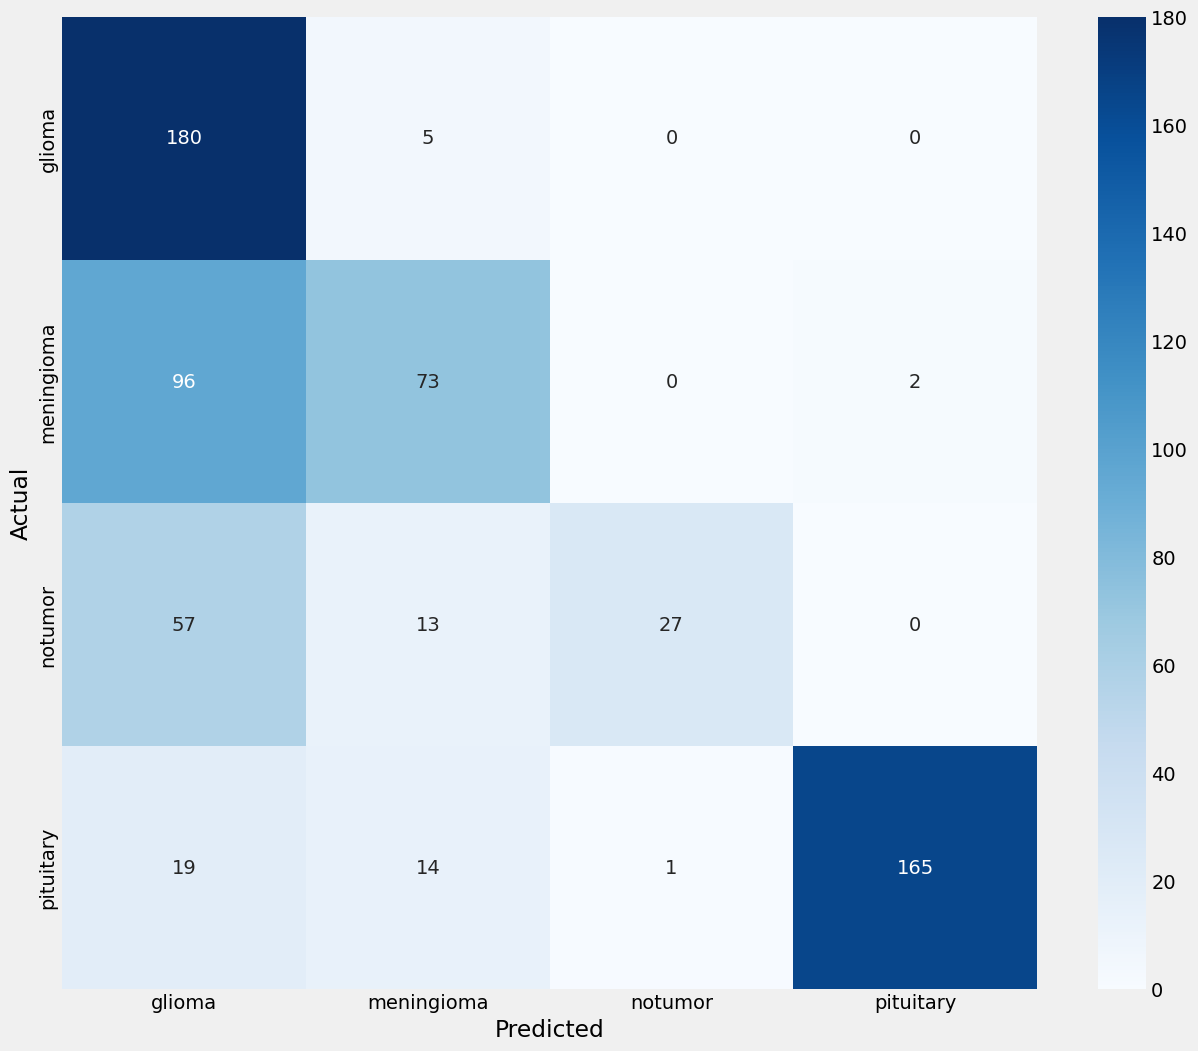

In [88]:
# Convert one-hot encoded labels to single-label indicators
y_val_single = np.argmax(y_val_fold, axis=1)
y_pred_single = np.argmax(y_pred_SVM_S, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val_single, y_pred_single)

plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()